<a class="anchor" id="TOC"></a>
# **Table of Contents**

>[Table of Contents](#TOC)

>[1. Introduction](#Introduction)

>[2. Set up, import data, and prepare data](#setup)

>[3. EDA- Time Series Data](#EDAT)

>>[3.1 Initial Exploration of Time Series Data Set](#IET)

>>[3.2 Descriptive Statistics of Time Series Data Frame](#DST)

>>[3.3 Finding the columns having the NULL values](#FCN)

>>[3.4 Total Inside Sales , everything that isn't made at the store](#TIS)

>>[3.5 Check for Missing Values](#MISS)

>>[3.6 Combined Average Sales (Inside + Food Service) by Site ID](#CAS)

>>[3.7 Average Diesel Sales by Site_ID](#ADS)

>>[3.8 Average Unleaded Sales by Site_ID](#AUS)

>>[3.9 Distribution of Sales (Inside + FoodService)](#DIF)

>>[3.10 Distribution of Fuel Sales (Diesel + Unleaded)](#DDU)

>>[3.11 Correlation matrix of all the 4 target variables](#CMT)

>>[3.12 Average Inside Sales by Day of the Week](#AIS)

>>[3.13 Average Food Service Sales by Day of the Week](#AFS)

>>[3.14 Combined Average Sales by Day of the Week](#CASD)

>>[3.15 Average Diesel & Unleaded sales by Day of the Week](#ADUD)

>>[3.16 Time Series Sliders](#TSS)

>>[3.17 Weekly Sales (Inside + Food Service)](#WIF)

>>[3.18 Monthly Aggregated Plot - Total inside sales and Food Service sales](#FIT)







>[4. EDA- Quantitative Data](#EDAQ)

>>[4.1 Set up, import data, and prepare Quantitative data](#IMPQ)

>>[4.2 Finding Columns having Null values](#MISSQ)

>>[4.3 Imputing Missing Values](#MISSQ2)

>>[4.4 Finding variability of columns](#var)

>>[4.5 Detecting Outliers](#dout)

>>[4.6 Separate variables into categorical and continuous](#var2)

>>[4.7 Visualizing Qualitative Features](#visq)

>>[4.8 Label encoding for converting Categorical variables to Numerical variables](#lab)


>[5. Merging the time series dataset with the qualitative dataset](#mer)

>>[5.1 Correlation Matrices](#corr)


>>[5.2 Holiday vs Non-Holiday total daily fuel sales](#hol)

>[Questions](#questions)

>[Results](#results)

>[Contributions](#contrib)

>>[Vinay Kumar Vascuri](#contrib4)


<a class="anchor" id="Introduction"></a>
# **1.Introduction**

Maverik, a high-growth retail firm planning to open 30 new stores annually. Accurate sales forecasts for the first year of these new stores are crucial for effective financial planning and resource allocation. Leveraging both qualitative and time series data, we will employ various machine learning algorithms to predict daily sales metrics. Our objective is to achieve forecasts that closely match the actual Return on Investment (ROI) and provide accurate sales metrics. The project focuses on generating daily-level forecasts, incorporating qualitative insights and network-wide seasonality patterns, to support Maverik's strategic decision-making.

## **Questions**

- Which weekday provides the most total sales? Is there more total sales during the weekend?
- What time of the year provides the most total sales? Is there more during the summer?
- Do most stores sell diesel gas?
- Does a stores local population or population's income effect total sales?
- Of the sites in the dataset which ones provide the most total sales? What charecteristics do they have?
- Are there any columns that has low to no variance or most commonly known as zero variance columns?
- Will inner merging using the 'site_id_msba' from the two datasets be efficient on creating a better model?
- What days has the highest total sales from the datasets for each revenue generating columns (Inside Sales, Food Services, Diesel Gallons, Unleaded Gallons)?

<a class="anchor" id="setup"></a>
# **2. Set up, import data, and prepare data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/maverik-capstone') # changing the default directory

<a class="anchor" id="EDAT"></a>
# **3. EDA -Time Series Data**

<a class="anchor" id="IET"></a>
## *3.1 Initial Exploration of Time Series Data Set*

In [ ]:
df_tsdm = pd.read_csv("time_series_data_msba.csv")
df_tsdm.head(20)

Unnamed: 0 capital_projects.soft_opening_date calendar.calendar_day_date  \
0            1                          6/14/2022                  6/17/2022   
1            2                          6/14/2022                  6/22/2022   
2            3                          6/14/2022                  6/23/2022   
3            4                          6/14/2022                  6/26/2022   
4            5                          6/14/2022                  6/27/2022   
5            6                          6/14/2022                  6/30/2022   
6            7                          6/14/2022                   7/1/2022   
7            8                          6/14/2022                   7/4/2022   
8            9                          6/14/2022                   7/6/2022   
9           10                          6/14/2022                   7/8/2022   
10          11                          6/14/2022                   7/9/2022   
11          12                          6/14/2022                  7/10/2022   
12          13                          6/14/2022                  7/12/2022   
13          14                          6/14/2022                  7/15/2022   
14          15                          6/14/2022                  7/20/2022   
15          16                          6/14/2022                   8/6/2022   
16          17                          6/14/2022                   8/9/2022   
17          18                          6/14/2022                  8/13/2022   
18          19                          6/14/2022                  8/14/2022   
19          20                          6/14/2022                  8/16/2022   

    calendar.fiscal_week_id_for_year calendar.day_of_week  \
0                                 25               Friday   
1                                 25            Wednesday   
2                                 25             Thursday   
3                                 26               Sunday   
4                                 26               Monday   
5                                 26             Thursday   
6                                 27               Friday   
7                                 27               Monday   
8                                 27            Wednesday   
9                                 28               Friday   
10                                28             Saturday   
11                                28               Sunday   
12                                28              Tuesday   
13                                29               Friday   
14                                29            Wednesday   
15                                32             Saturday   
16                                32              Tuesday   
17                                33             Saturday   
18                                33               Sunday   
19                                33              Tuesday   

   calendar_information.holiday calendar_information.type_of_day  \
0                          NONE                          WEEKDAY   
1                          NONE                          WEEKDAY   
2                          NONE                          WEEKDAY   
3                          NONE                          WEEKEND   
4                          NONE                          WEEKDAY   
5                          NONE                          WEEKDAY   
6                          NONE                          WEEKDAY   
7              Independence Day                          WEEKDAY   
8                          NONE                          WEEKDAY   
9                          NONE                          WEEKDAY   
10                         NONE                          WEEKEND   
11                         NONE                          WEEKEND   
12                         NONE                          WEEKDAY   
13                         NONE                          WEEKDAY   
14                   

<a class="anchor" id="DST"></a>
## *3.2 Descriptive Statistics of Time Series Data Frame*

In [ ]:
df_tsdm.describe()

Unnamed: 0  calendar.fiscal_week_id_for_year  \
count  13908.000000                      13908.000000   
mean    6954.500000                         26.501079   
std     4015.038107                         14.998715   
min        1.000000                          1.000000   
25%     3477.750000                         14.000000   
50%     6954.500000                         26.000000   
75%    10431.250000                         39.000000   
max    13908.000000                         52.000000   

       daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
count                      13908.000000                      13908.000000   
mean                        2846.537988                        759.922326   
std                          981.299870                        341.578220   
min                            0.000000                          0.000000   
25%                         2181.156250                        521.087875   
50%                         2693.976250                        697.434500   
75%                         3325.306250                        924.282625   
max                         7172.466000                       2531.662000   

             diesel      unleaded  site_id_msba  
count  13908.000000  13908.000000  13908.000000  
mean    1702.585227   2382.091588  23041.052632  
std     2161.208192   1025.518658    710.634218  
min        0.000000    240.180500  21560.000000  
25%      383.062750   1654.149000  22540.000000  
50%     1018.920000   2256.677500  22907.500000  
75%     2283.297625   2928.254000  23555.000000  
max    20853.952000   8077.233500  24535.000000

In [ ]:
df_tsdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          13908 non-null  int64  
 1   capital_projects.soft_opening_date  13908 non-null  object 
 2   calendar.calendar_day_date          13908 non-null  object 
 3   calendar.fiscal_week_id_for_year    13908 non-null  int64  
 4   calendar.day_of_week                13908 non-null  object 
 5   calendar_information.holiday        13908 non-null  object 
 6   calendar_information.type_of_day    13908 non-null  object 
 7   daily_yoy_ndt.total_inside_sales    13908 non-null  float64
 8   daily_yoy_ndt.total_food_service    13908 non-null  float64
 9   diesel                              13908 non-null  float64
 10  unleaded                            13908 non-null  float64
 11  site_id_msba                        13908

<a class="anchor" id="FCN"></a>
## *3.3 Finding the columns having the NULL values*

In [ ]:
# Check for null values in the Time Series DataFrame
null_values_time_series = df_tsdm.isnull().sum()

# Display the columns with null values and their counts
print("Null Values in Time Series DataFrame:")
print(null_values_time_series[null_values_time_series > 0])


Null Values in Time Series DataFrame:
Series([], dtype: int64)


<a class="anchor" id="TIS"></a>
## *3.4 Total Inside Sales , everything that isn't made at the store*

In [ ]:
# Group the data by 'site_id' and calculate the maximum and minimum inside sales
inside_sales_summary = df_tsdm.groupby('site_id_msba')['daily_yoy_ndt.total_inside_sales'].agg(['max', 'min'])

# Reset the index to make 'site_id' a column instead of an index
inside_sales_summary = inside_sales_summary.reset_index()

# Rename the columns for clarity
inside_sales_summary.columns = ['site_id', 'max_inside_sales', 'min_inside_sales']

# Display the summary
print(inside_sales_summary)


    site_id  max_inside_sales  min_inside_sales
0     21560         5975.6060         1339.6110
1     21980         6191.9060         1094.6740
2     22015         4871.8845         1170.4525
3     22085         7172.4660         1454.4460
4     22120         3849.2125          693.1925
5     22260         4692.3625         1207.9620
6     22330         3690.6800          165.7285
7     22400         4055.4920            0.0000
8     22505         3328.3390          449.0150
9     22540         4663.4350         1002.6240
10    22575         3794.0000          867.7970
11    22645         3346.2660          968.9645
12    22680         5710.0855         1131.3715
13    22715         4399.4545          825.9055
14    22750         6579.7865         1939.8330
15    22785         4282.6840         1740.1405
16    22820         3879.5400         1069.2465
17    22855         4811.7370         1165.8115
18    22890         4269.7655          655.8300
19    22925         3913.6825         14

In [ ]:
daily_sales_max = df_tsdm.groupby('site_id_msba')['daily_yoy_ndt.total_inside_sales'].max()

In [ ]:
# Calculate the maximum daily inside sales for each site_id
daily_sales_max = df_tsdm.groupby('site_id_msba')['daily_yoy_ndt.total_inside_sales'].max()

# Find the site_id with the highest and lowest maximum daily inside sales
site_id_highest_sales = daily_sales_max.idxmax()
site_id_lowest_sales = daily_sales_max.idxmin()

# Display the results
print(f"Site ID with the highest maximum daily inside sales: {site_id_highest_sales}")
print(f"Site ID with the lowest maximum daily inside sales: {site_id_lowest_sales}")


Site ID with the highest maximum daily inside sales: 22085
Site ID with the lowest maximum daily inside sales: 23485


In [ ]:
df_tsdm.describe()

Unnamed: 0  calendar.fiscal_week_id_for_year  \
count  13908.000000                      13908.000000   
mean    6954.500000                         26.501079   
std     4015.038107                         14.998715   
min        1.000000                          1.000000   
25%     3477.750000                         14.000000   
50%     6954.500000                         26.000000   
75%    10431.250000                         39.000000   
max    13908.000000                         52.000000   

       daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
count                      13908.000000                      13908.000000   
mean                        2846.537988                        759.922326   
std                          981.299870                        341.578220   
min                            0.000000                          0.000000   
25%                         2181.156250                        521.087875   
50%                         2693.976250                        697.434500   
75%                         3325.306250                        924.282625   
max                         7172.466000                       2531.662000   

             diesel      unleaded  site_id_msba  
count  13908.000000  13908.000000  13908.000000  
mean    1702.585227   2382.091588  23041.052632  
std     2161.208192   1025.518658    710.634218  
min        0.000000    240.180500  21560.000000  
25%      383.062750   1654.149000  22540.000000  
50%     1018.920000   2256.677500  22907.500000  
75%     2283.297625   2928.254000  23555.000000  
max    20853.952000   8077.233500  24535.000000

<a class="anchor" id="MISS"></a>
## *3.5 Check for Missing values*

In [ ]:
# Check for missing values in the entire DataFrame
null_values = df_tsdm.isnull().sum()

#Calculate the percentage of missing values
total_values = df_tsdm.shape[0]  # Total number of rows
percentage_missing = (null_values / total_values) * 100

# Create a DataFrame to display the results
missing_data_info = pd.DataFrame({
    'Column': null_values.index,
    'Missing Values': null_values.values,
    'Percentage Missing': percentage_missing.values
})

# Filter for columns with missing values
columns_with_missing = missing_data_info[missing_data_info['Missing Values'] > 0]

# Display columns with missing values
print("Columns with Missing Values:")
print(columns_with_missing)


Columns with Missing Values:
Empty DataFrame
Columns: [Column, Missing Values, Percentage Missing]
Index: []


<a class="anchor" id="CAS"></a>
## *3.6 Combined Average Sales (Inside + Food Service) by Site ID*

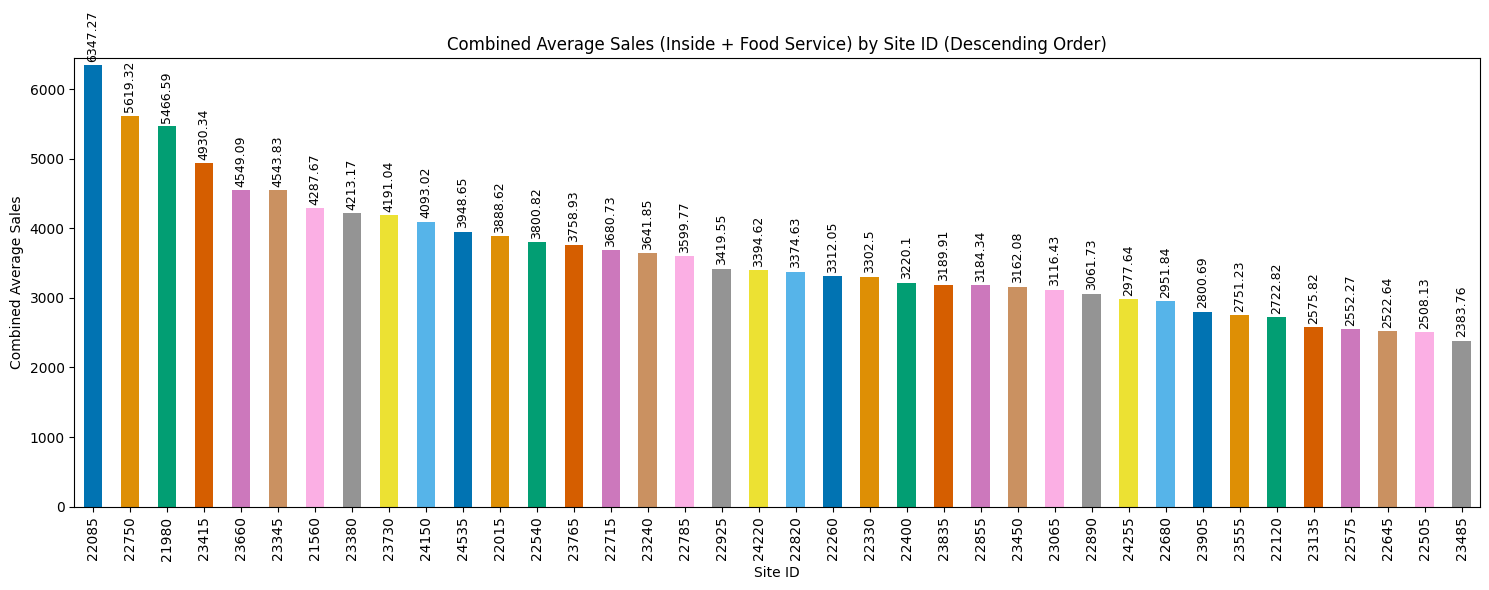

In [ ]:
# Group data by 'site_id_msba' and calculate the average inside sales and food service sales for each site_id
average_inside_sales = df_tsdm.groupby('site_id_msba')['daily_yoy_ndt.total_inside_sales'].mean()
average_food_service_sales = df_tsdm.groupby('site_id_msba')['daily_yoy_ndt.total_food_service'].mean()

# Combine the average values by summing them
combined_average_sales = average_inside_sales + average_food_service_sales

# Sort the data in descending order of combined average sales
combined_average_sales = combined_average_sales.sort_values(ascending=False)

# Define a color palette for the bars
colors = sns.color_palette('colorblind', len(combined_average_sales))

# Create a bar plot for combined average sales by site_id with different colors
plt.figure(figsize=(15, 6))
ax = combined_average_sales.plot(kind='bar', color=colors)
plt.xlabel('Site ID')
plt.ylabel('Combined Average Sales')
plt.title('Combined Average Sales (Inside + Food Service) by Site ID (Descending Order)')
plt.xticks(rotation=90)  # Keep x-axis labels horizontal

# Add y-axis values with some space at the top of each bar
y_offset = 50  # Adjust this value to control the spacing
for i, v in enumerate(combined_average_sales):
    ax.text(i, v + y_offset, str(round(v, 2)), ha='center', va='bottom', fontsize=9, rotation='vertical')

# Adjust y-axis limits to provide space at the top
plt.ylim(bottom=0, top=max(combined_average_sales) + y_offset * 2)

plt.tight_layout()

# Show the combined bar plot
plt.show()

*Site ID 22085 has the Highest Combined Sales of all the sites where as Site ID 23485 has the lowest combined sales. Top 5 site_ids having highest sales are 22085, 22750, 21980, 23415, 23660*

<a class="anchor" id="ADS"></a>
## *3.7 Average Diesel Sales by Site_ID*

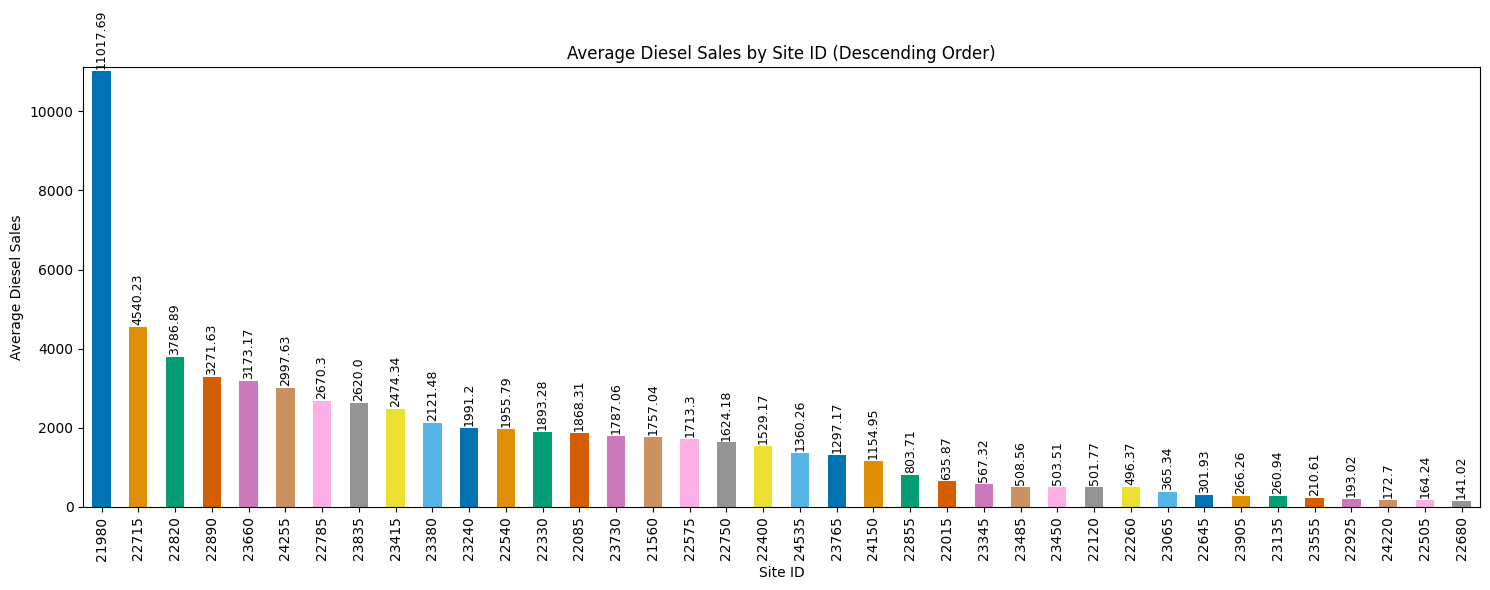

In [ ]:
# Group data by 'site_id_msba' and calculate the average diesel sales for each site_id
average_diesel_sales = df_tsdm.groupby('site_id_msba')['diesel'].mean()

# Sort the data in descending order of average diesel sales
average_diesel_sales = average_diesel_sales.sort_values(ascending=False)

# Define a color palette for the bars
colors = sns.color_palette('colorblind', len(average_diesel_sales))

# Create a bar plot for average diesel sales by site_id with different colors
plt.figure(figsize=(15, 6))
ax = average_diesel_sales.plot(kind='bar', color=colors)
plt.xlabel('Site ID')
plt.ylabel('Average Diesel Sales')
plt.title('Average Diesel Sales by Site ID (Descending Order)')
plt.xticks(rotation=90)  # Keep x-axis labels horizontal

# Add y-axis values with some space at the top of each bar
y_offset = 50  # Adjust this value to control the spacing
for i, v in enumerate(average_diesel_sales):
    ax.text(i, v + y_offset, str(round(v, 2)), ha='center', va='bottom', fontsize=9, rotation='vertical')

# Adjust y-axis limits to provide space at the top
plt.ylim(bottom=0, top=max(average_diesel_sales) + y_offset * 2)

plt.tight_layout()

# Show the bar plot for diesel sales
plt.show()



*21980 has the highest Diesel Sales*

<a class="anchor" id="AUS"></a>
## *3.8 Average Unleaded Sales by Site_ID*

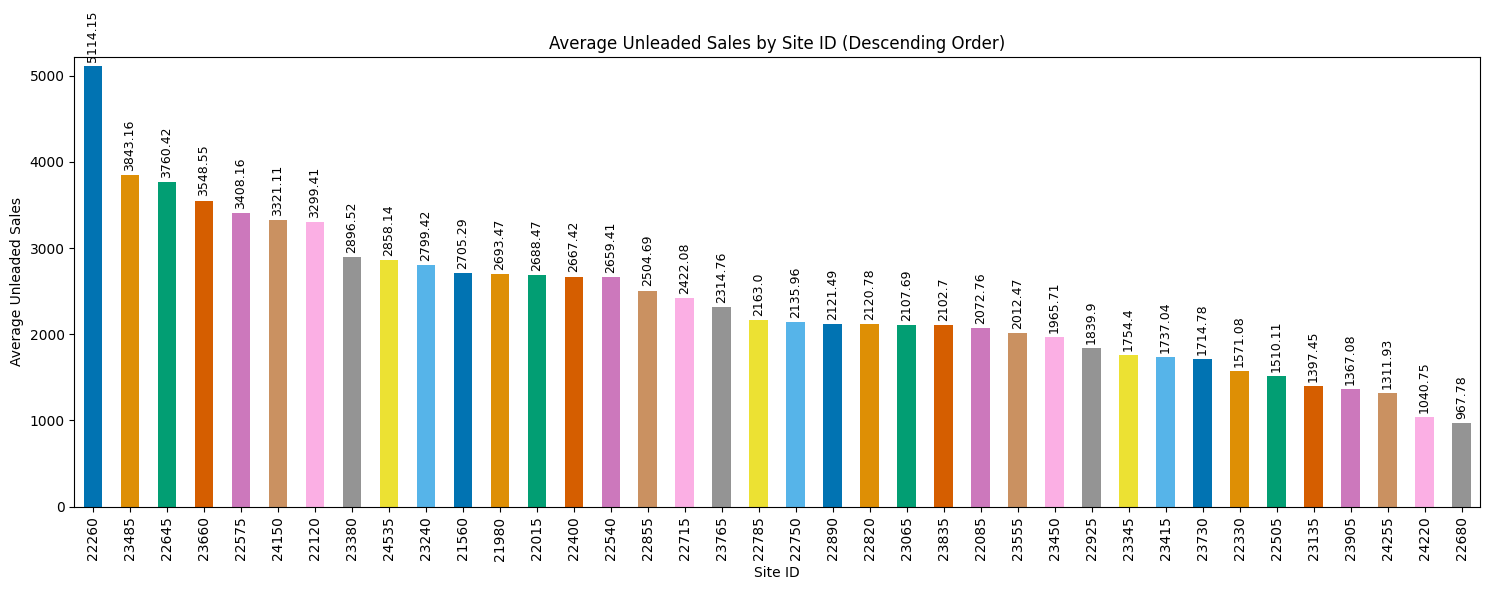

In [ ]:
# Group data by 'site_id_msba' and calculate the average unleaded sales for each site_id
average_unleaded_sales = df_tsdm.groupby('site_id_msba')['unleaded'].mean()

# Sort the data in descending order of average unleaded sales
average_unleaded_sales = average_unleaded_sales.sort_values(ascending=False)

# Define a color palette for the bars
colors = sns.color_palette('colorblind', len(average_unleaded_sales))

# Create a bar plot for average unleaded sales by site_id with different colors
plt.figure(figsize=(15, 6))
ax = average_unleaded_sales.plot(kind='bar', color=colors)
plt.xlabel('Site ID')
plt.ylabel('Average Unleaded Sales')
plt.title('Average Unleaded Sales by Site ID (Descending Order)')
plt.xticks(rotation=90)  # Keep x-axis labels horizontal

# Add y-axis values with some space at the top of each bar
y_offset = 50  # Adjust this value to control the spacing
for i, v in enumerate(average_unleaded_sales):
    ax.text(i, v + y_offset, str(round(v, 2)), ha='center', va='bottom', fontsize=9, rotation='vertical')

# Adjust y-axis limits to provide space at the top
plt.ylim(bottom=0, top=max(average_unleaded_sales) + y_offset * 2)

plt.tight_layout()

# Show the bar plot for unleaded sales
plt.show()


<a class="anchor" id="DIF"></a>
## *3.9 Distribution of Sales (Inside + FoodService)*

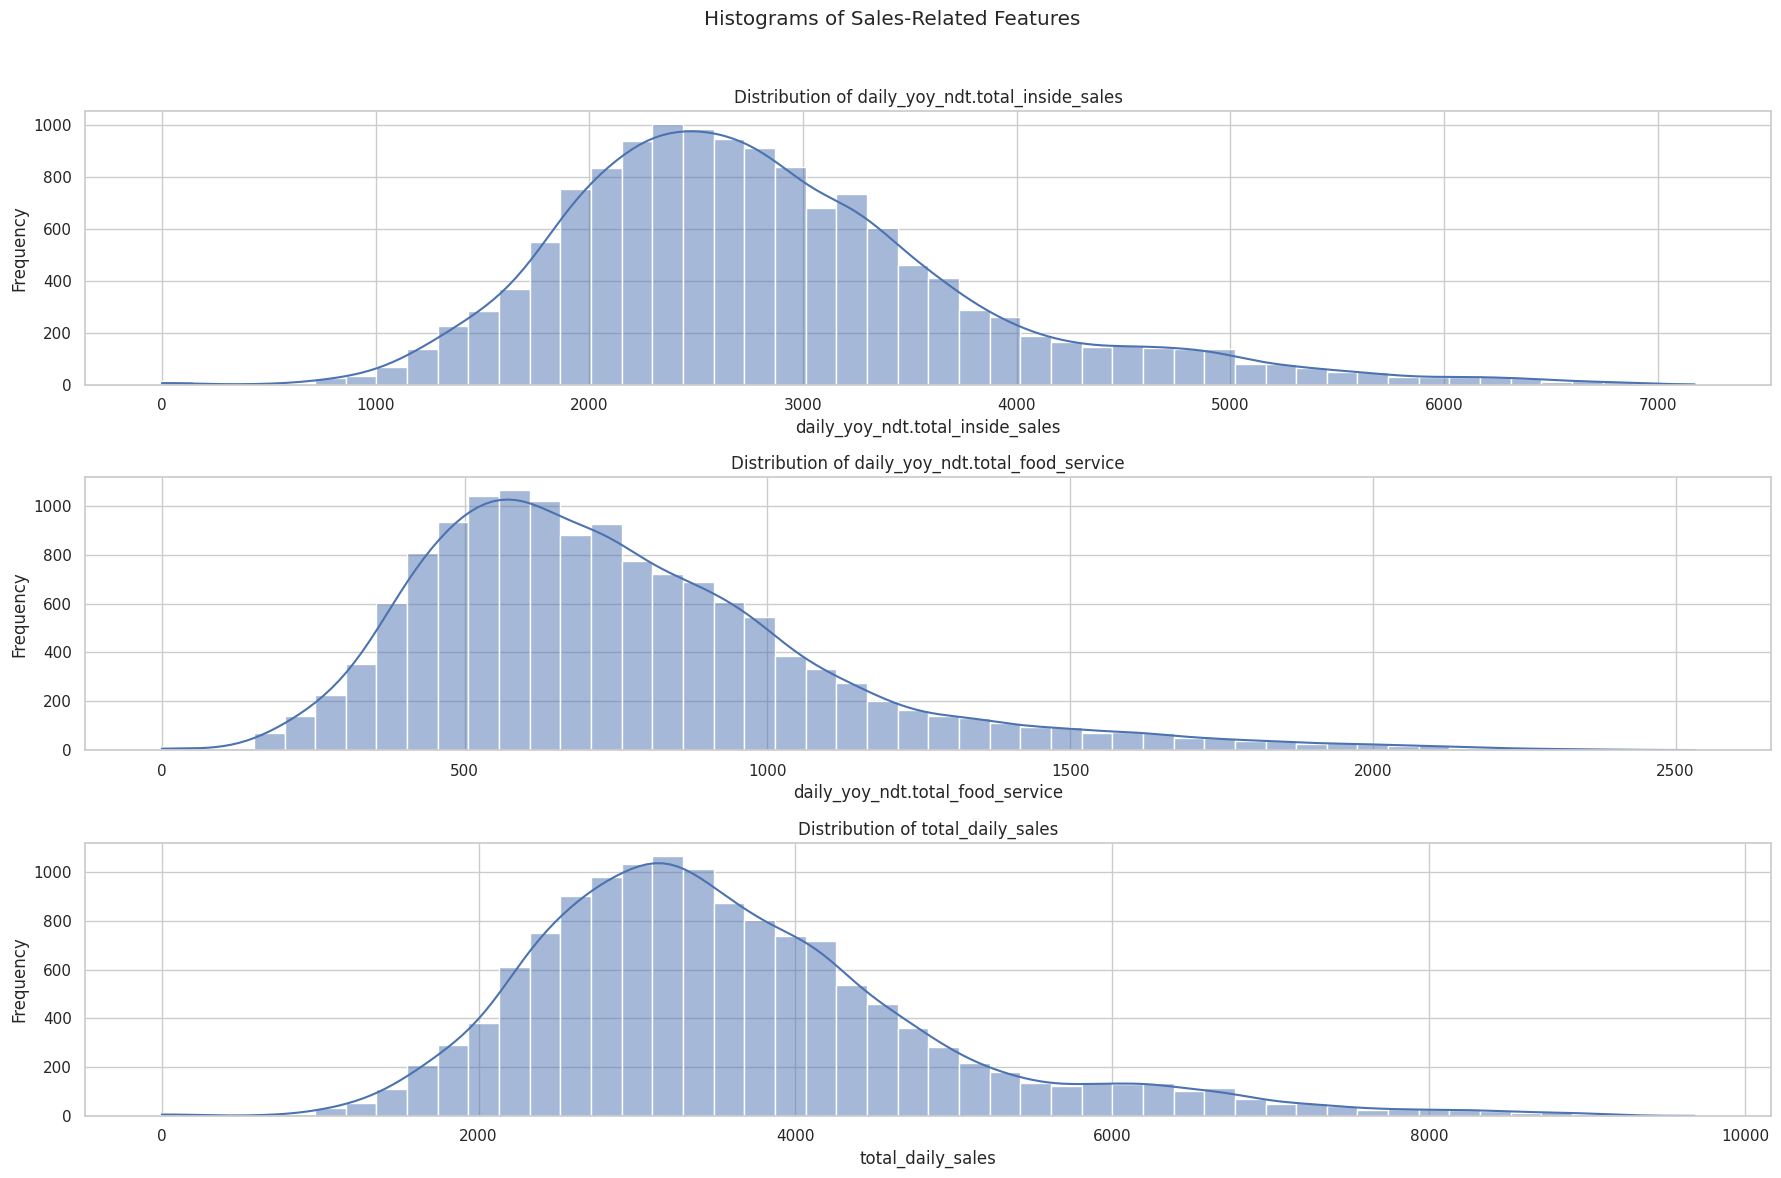

In [ ]:
sns.set(style="whitegrid")
sales_columns = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']
df_tsdm['total_daily_sales'] = df_tsdm[sales_columns].sum(axis=1)

fig, axes = plt.subplots(3,1, figsize=(18, 12))
fig.suptitle('Histograms of Sales-Related Features')

for i, col in enumerate(sales_columns + ['total_daily_sales']):
    sns.histplot(df_tsdm[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Daily Inside Sales:** Appears to be right-skewed, with most stores having lower daily inside sales.

**Daily Food Service:** This is also right-skewed; the majority of stores have lower daily food service sales.

**Total Sales:** The aggregated sales show a right-skewed distribution.

These skewnesses suggest that outlier detection and possibly transformation may be necessary for modeling.



<a class="anchor" id="DDU"></a>
## *3.10 Distribution of Fuel Sales (Diesel + Unleaded)*

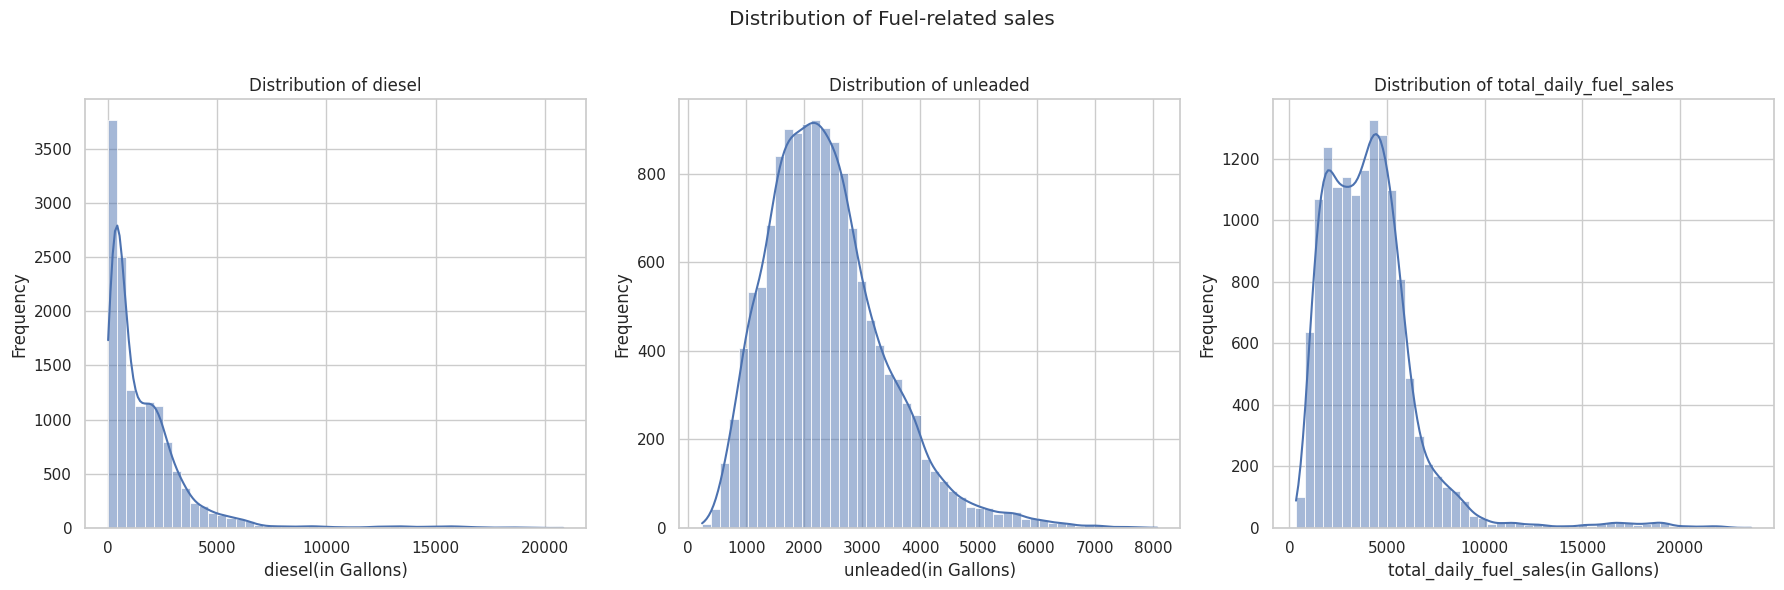

In [ ]:
fuel_features = ['diesel', 'unleaded']
df_tsdm['total_daily_fuel_sales'] = df_tsdm[fuel_features].sum(axis=1)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Fuel-related sales')

for i, col in enumerate(fuel_features + ['total_daily_fuel_sales']):
    sns.histplot(df_tsdm[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col + '(in Gallons)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Diesel:** Exhibits a right-skewed distribution similar to the previous variables.

**Unleaded:** Slightly right-skewed but relatively more evenly distributed compared to other variables.

**Total Fuel Sales:** Exhibits right-skewed distribution which is inline with diesel and unleaded sales

<a class="anchor" id="CMT"></a>
## *3.11 Correlation matrix of all the 4 target variables*

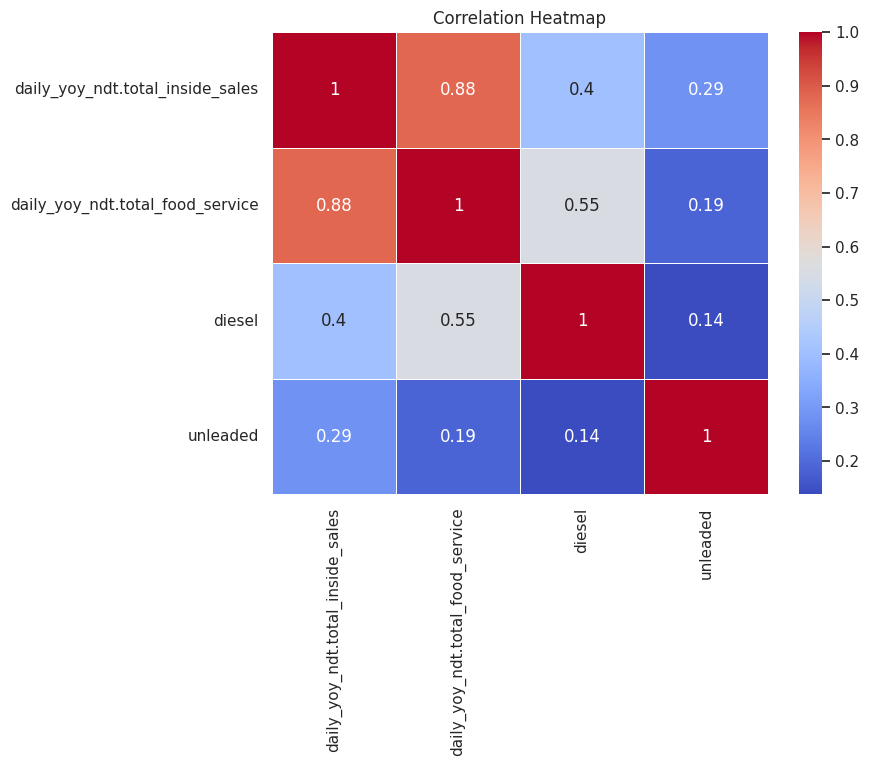

In [ ]:
variables = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']
correlation_matrix = df_tsdm[variables].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



<a class="anchor" id="AIS"></a>
## *3.12 Average Inside Sales by Day of the Week*

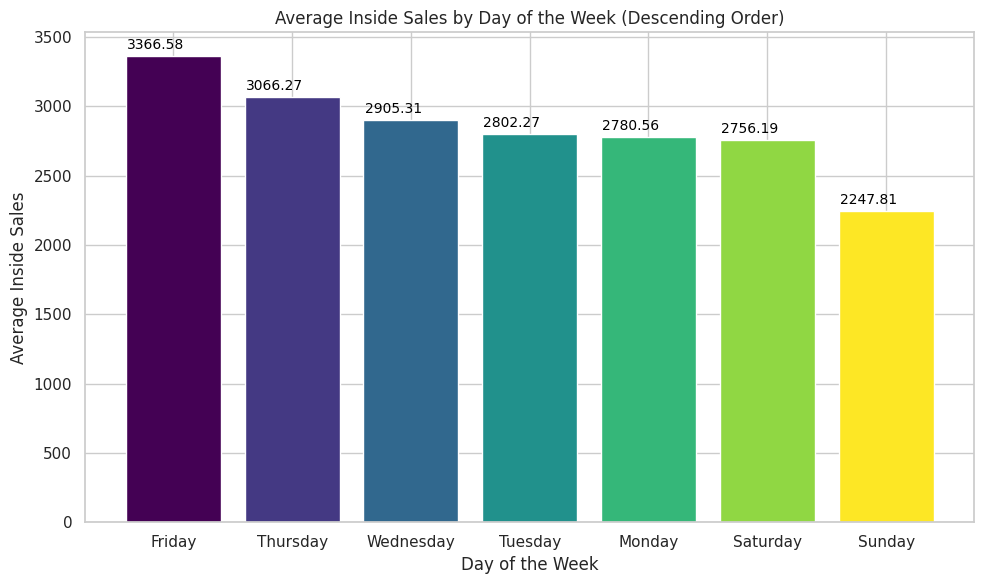

In [ ]:
# Convert 'calendar.calendar_day_date' to a datetime object if it's not already
df_tsdm['calendar.calendar_day_date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])

# Extract the day of the week as an integer (0=Monday, 1=Tuesday, ..., 6=Sunday)
df_tsdm['calendar.day_of_week'] = df_tsdm['calendar.calendar_day_date'].dt.weekday

# Group the data by 'calendar.day_of_week' and calculate the average inside sales for each day of the week
average_sales_by_day_of_week = df_tsdm.groupby('calendar.day_of_week')['daily_yoy_ndt.total_inside_sales'].mean()

# Define the names of days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the days of the week in descending order of average sales
sorted_days_of_week = [day for _, day in sorted(zip(average_sales_by_day_of_week, days_of_week), reverse=True)]
sorted_sales = sorted(average_sales_by_day_of_week, reverse=True)

# Create a list of unique colors for each day
unique_colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_days_of_week)))

# Create a bar plot with different colors for each day and sorted in descending order
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_days_of_week, sorted_sales, color=unique_colors)
plt.title('Average Inside Sales by Day of the Week (Descending Order)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Inside Sales')

# Annotate each bar with its respective y-axis value
for bar, value in zip(bars, sorted_sales):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(round(value, 2)), ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()



**Friday** is the day of the week where the Average Inside sales are highest. We can see a gradual increase in average sales from Monday to Friday with the sales dipping on the weekends Saturday and Sunday.

<a class="anchor" id="AFS"></a>
## *3.13 Average Food Service Sales by Day of the Week*

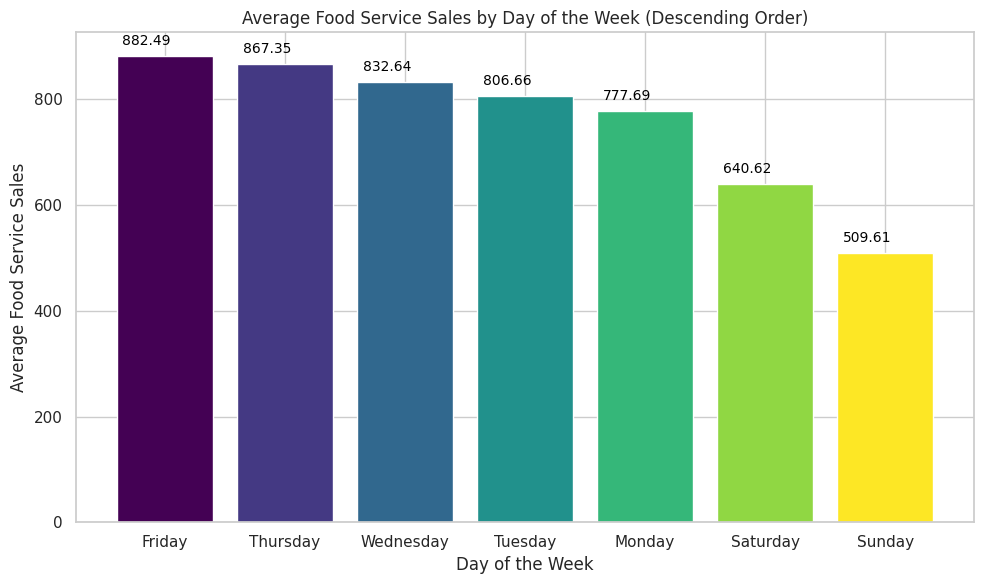

In [ ]:
# Convert 'calendar.calendar_day_date' to a datetime object if it's not already
df_tsdm['calendar.calendar_day_date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])

# Extract the day of the week as an integer (0=Monday, 1=Tuesday, ..., 6=Sunday)
df_tsdm['calendar.day_of_week'] = df_tsdm['calendar.calendar_day_date'].dt.weekday

# Group the data by 'calendar.day_of_week' and calculate the average food service sales for each day of the week
average_food_sales_by_day_of_week = df_tsdm.groupby('calendar.day_of_week')['daily_yoy_ndt.total_food_service'].mean()

# Define the names of days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the days of the week in descending order of average food service sales
sorted_days_of_week = [day for _, day in sorted(zip(average_food_sales_by_day_of_week, days_of_week), reverse=True)]
sorted_food_sales = sorted(average_food_sales_by_day_of_week, reverse=True)

# Create a list of unique colors for each day
unique_colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_days_of_week)))

# Create a bar plot with different colors for each day and sorted in descending order
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_days_of_week, sorted_food_sales, color=unique_colors)
plt.title('Average Food Service Sales by Day of the Week (Descending Order)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Food Service Sales')

# Annotate each bar with its respective y-axis value
for bar, value in zip(bars, sorted_food_sales):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 20, str(round(value, 2)), ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


**Friday** is the day of the week where the Average food sales are highest

<a class="anchor" id="CASD"></a>
## *3.14 Combined Average Sales by Day of the Week*

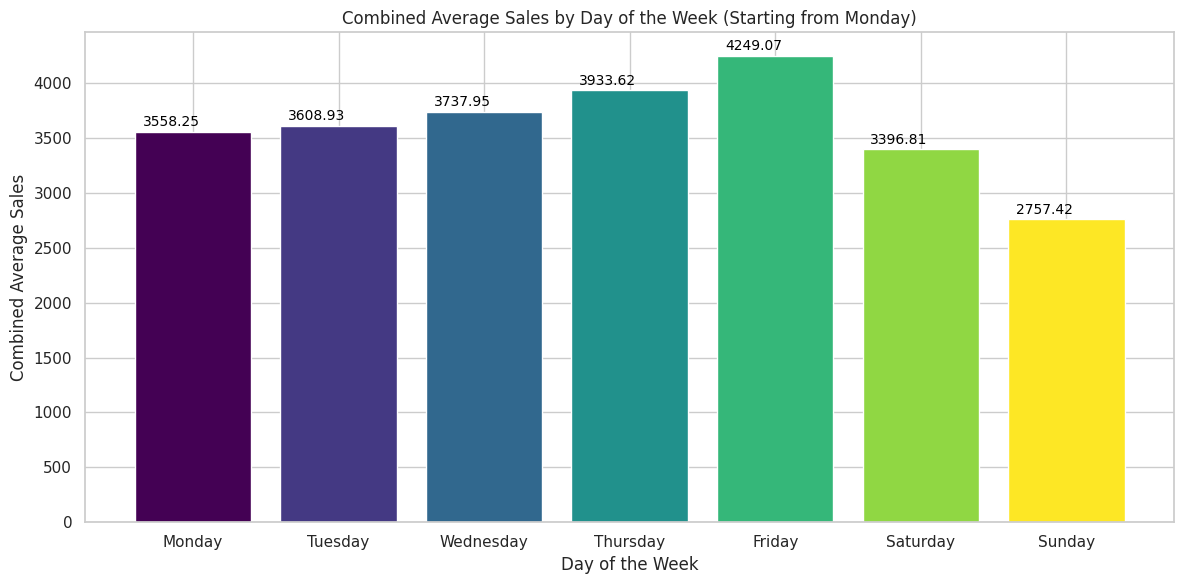

In [ ]:
# Convert 'calendar.calendar_day_date' to a datetime object if it's not already
df_tsdm['calendar.calendar_day_date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])

# Extract the day of the week as an integer (0=Monday, 1=Tuesday, ..., 6=Sunday)
df_tsdm['calendar.day_of_week'] = df_tsdm['calendar.calendar_day_date'].dt.weekday

# Define the names of days of the week starting from Monday
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by 'calendar.day_of_week' and calculate the average inside sales and food service sales for each day of the week
average_inside_sales_by_day_of_week = df_tsdm.groupby('calendar.day_of_week')['daily_yoy_ndt.total_inside_sales'].mean()
average_food_sales_by_day_of_week = df_tsdm.groupby('calendar.day_of_week')['daily_yoy_ndt.total_food_service'].mean()

# Combine inside sales and food service sales for each day of the week
combined_sales = average_inside_sales_by_day_of_week + average_food_sales_by_day_of_week

# Create a list of unique colors for each day
unique_colors = plt.cm.viridis(np.linspace(0, 1, len(days_of_week)))

# Create a bar plot with different colors for each day
plt.figure(figsize=(12, 6))
bars = plt.bar(days_of_week, combined_sales, color=unique_colors)
plt.title('Combined Average Sales by Day of the Week (Starting from Monday)')
plt.xlabel('Day of the Week')
plt.ylabel('Combined Average Sales')

# Annotate each bar with its respective y-axis value
for bar, value in zip(bars, combined_sales):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(round(value, 2)), ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


 *Friday Records the Highest sales. There is a gradual increase from Monday to Friday and then a dip on Weekends*

<a class="anchor" id="ADUD"></a>
## *3.15 Average Diesel & Unleaded sales by Day of the Week*

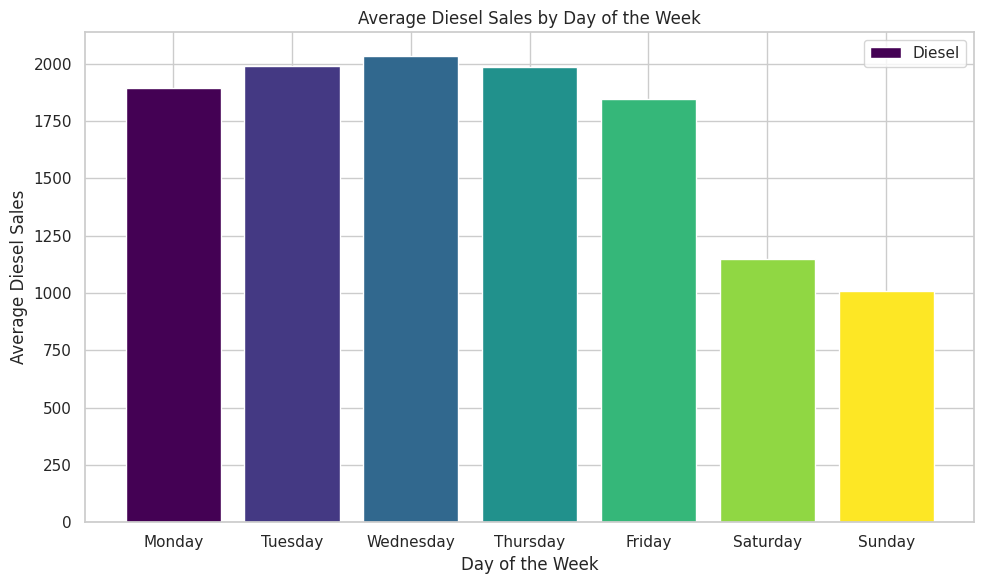

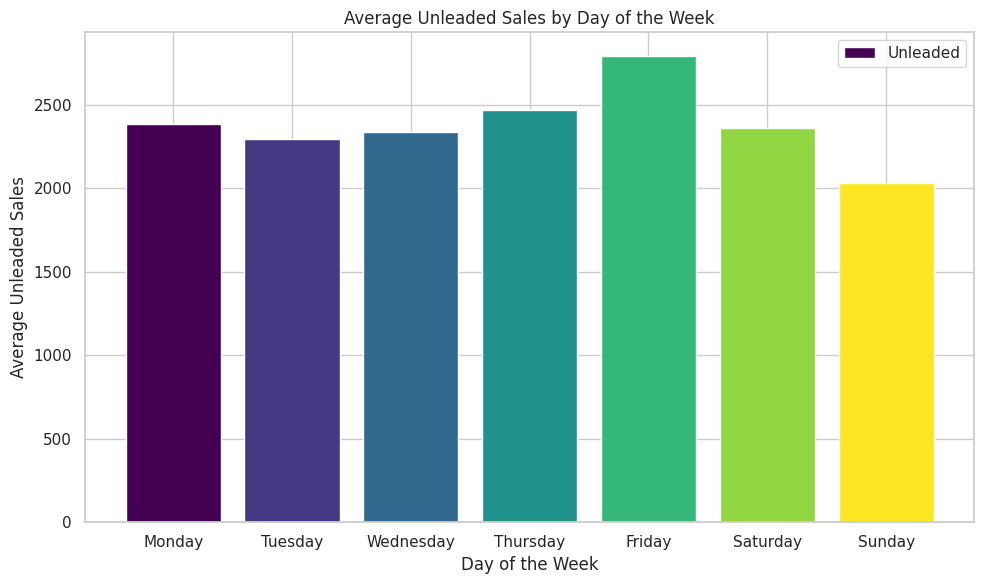

In [ ]:
# Convert 'calendar.calendar_day_date' to a datetime object if it's not already
df_tsdm['calendar.calendar_day_date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])

# Extract the day of the week as an integer (0=Monday, 1=Tuesday, ..., 6=Sunday)
df_tsdm['calendar.day_of_week'] = df_tsdm['calendar.calendar_day_date'].dt.weekday

# Group the data by 'calendar.day_of_week' and calculate the average diesel and unleaded sales for each day of the week
average_diesel_sales_by_day_of_week = df_tsdm.groupby('calendar.day_of_week')['diesel'].mean()
average_unleaded_sales_by_day_of_week = df_tsdm.groupby('calendar.day_of_week')['unleaded'].mean()

# Define the names of days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the days of the week in the order they appear (no sorting needed)
sorted_days_of_week = days_of_week

# Create a list of unique colors for each day
unique_colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_days_of_week)))

# Create separate bar plots for diesel and unleaded sales, using the same x-axis and y-axis
plt.figure(figsize=(10, 6))

# Plot Diesel Sales
plt.bar(sorted_days_of_week, average_diesel_sales_by_day_of_week, color=unique_colors, label='Diesel')
plt.title('Average Diesel Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Diesel Sales')
plt.legend()
plt.tight_layout()

# Show the first bar plot
plt.show()

# Create a new figure for Unleaded Sales
plt.figure(figsize=(10, 6))

# Plot Unleaded Sales
plt.bar(sorted_days_of_week, average_unleaded_sales_by_day_of_week, color=unique_colors, label='Unleaded')
plt.title('Average Unleaded Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Unleaded Sales')
plt.legend()
plt.tight_layout()

# Show the second bar plot
plt.show()


*Diesel sales are highest on Wednesday and Unleaded sales are highest on Friday*

<a class="anchor" id="TSS"></a>
## *3.16 Time Series Sliders*

In [ ]:
# Extract month and year from the date column
df_tsdm['Date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])

# Create a time series slider chart for daily sales
fig = px.line(df_tsdm, x='Date', y=[ 'diesel', 'unleaded'],
              labels={'Date': 'Date', 'value': 'Sales'},
              title='Time Series Slider Chart of Daily Sales- Diesel & Unleaded',
              width=1200, height=600)

# Add a slider for selecting the date range
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()

*Time Series slider chart of Fuel Sales*

In [ ]:
# Extract date, year, and month from the date column
df_tsdm['Date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])
df_tsdm['Year'] = df_tsdm['Date'].dt.year
df_tsdm['Month'] = df_tsdm['Date'].dt.strftime('%Y-%m-%d')

# Group the data by date and calculate the sum of sales columns
grouped = df_tsdm.groupby(['Year', 'Month'])[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].sum().reset_index()

# Create a vertical bar chart for daily sales
fig1 = go.Figure(data=[
    go.Bar(name='Inside Sales', x=grouped['Month'], y=grouped['daily_yoy_ndt.total_inside_sales'], marker_color='blue'),
    go.Bar(name='Food Service', x=grouped['Month'], y=grouped['daily_yoy_ndt.total_food_service'], marker_color='green'),
    go.Bar(name='Diesel', x=grouped['Month'], y=grouped['diesel'], marker_color='orange'),
    go.Bar(name='Unleaded', x=grouped['Month'], y=grouped['unleaded'], marker_color='red')
])

# Add a time series slider chart for daily sales
fig2 = px.line(grouped, x='Month', y=['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded'],
              labels={'Month': 'Date', 'value': 'Sales'},
              title='Time Series Slider Chart of Daily Sales',
              width=800, height=400, range_x=[grouped['Month'].min(), grouped['Month'].max()])

# Combine the two figures into subplots
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add the vertical bar chart to the first subplot
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig1.data[1], row=1, col=1)
fig.add_trace(fig1.data[2], row=1, col=1)
fig.add_trace(fig1.data[3], row=1, col=1)

# Add the time series slider chart to the second subplot
fig.add_trace(fig2.data[0], row=2, col=1)
fig.add_trace(fig2.data[1], row=2, col=1)
fig.add_trace(fig2.data[2], row=2, col=1)
fig.add_trace(fig2.data[3], row=2, col=1)

# Update the layout of the combined figure
fig.update_layout(
    title='Combined Vertical Bar Chart and Time Series Slider Chart',
    xaxis_title='Date',
    yaxis_title='Sales',
    xaxis2=dict(rangeslider=dict(visible=True)),
    yaxis2=dict(title='Sales'),
)

# Show the combined figure
fig.show()


*Time Series slider chart of all Target Variables*

<a class="anchor" id="WIF"></a>
## *3.17 Weekly Sales (Inside + Food Service)*

**Total Inside Sales - each week**





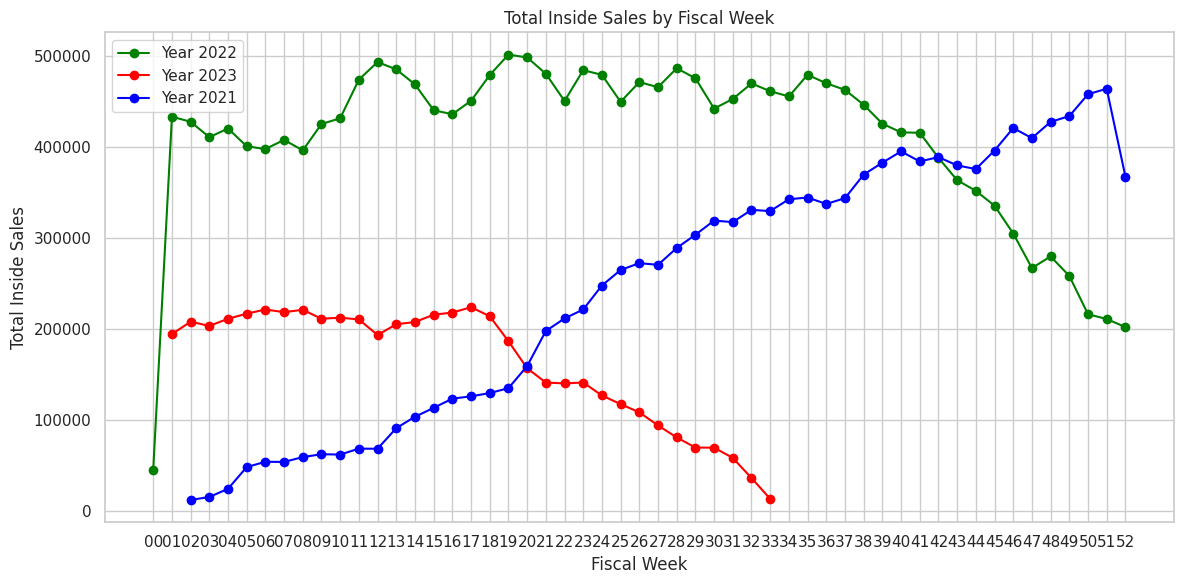

In [ ]:
# Convert the 'calendar.calendar_day_date' column to a datetime format
df_tsdm['calendar.calendar_day_date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])

# Extract the fiscal year and fiscal week from the date column
df_tsdm['Fiscal_Year'] = df_tsdm['calendar.calendar_day_date'].dt.year
df_tsdm['Fiscal_Week'] = df_tsdm['calendar.calendar_day_date'].dt.strftime('%U')

# Group the data by fiscal year and fiscal week, then calculate the total inside sales for each week
weekly_inside_sales = df_tsdm.groupby(['Fiscal_Year', 'Fiscal_Week'])['daily_yoy_ndt.total_inside_sales'].sum()

# Create a line plot of total inside sales by fiscal week
plt.figure(figsize=(12, 6))

# Specify custom colors for each year
colors = {
    2021: 'blue',
    2022: 'green',
    2023: 'red'
}

# Plot the data for each fiscal year separately with different colors
for year in df_tsdm['Fiscal_Year'].unique():
    data = weekly_inside_sales[year].reset_index()
    plt.plot(data['Fiscal_Week'], data['daily_yoy_ndt.total_inside_sales'], marker='o', linestyle='-', label=f'Year {year}', color=colors[year])

plt.title('Total Inside Sales by Fiscal Week')
plt.xlabel('Fiscal Week')
plt.ylabel('Total Inside Sales')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



*For year 2021, Week 51 has the highest Inside Sales*
*For year 2022, Week 19 has the highest Inside Sales*
*For year 2023, Week 17 has the highest Inside Sales*


**Total Food Service Sales - each week**


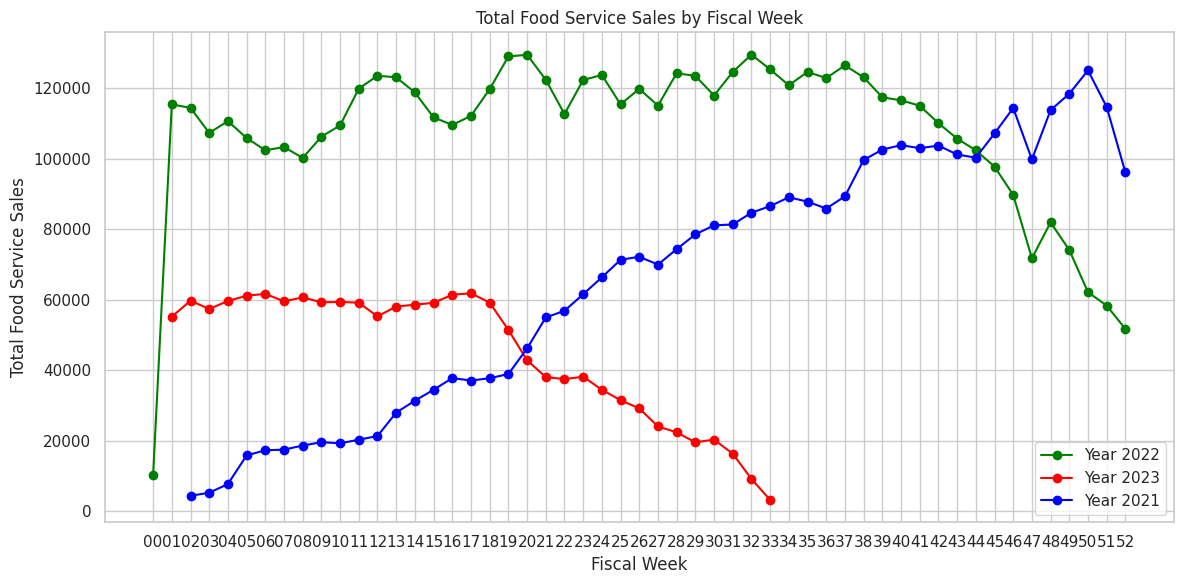

In [ ]:
# Convert the 'calendar.calendar_day_date' column to a datetime format
df_tsdm['calendar.calendar_day_date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])

# Extract the fiscal year and fiscal week from the date column
df_tsdm['Fiscal_Year'] = df_tsdm['calendar.calendar_day_date'].dt.year
df_tsdm['Fiscal_Week'] = df_tsdm['calendar.calendar_day_date'].dt.strftime('%U')

# Group the data by fiscal year and fiscal week, then calculate the total food service sales for each week
weekly_food_service_sales = df_tsdm.groupby(['Fiscal_Year', 'Fiscal_Week'])['daily_yoy_ndt.total_food_service'].sum()

# Create a line plot of total food service sales by fiscal week
plt.figure(figsize=(12, 6))

# Specify custom colors for each year
colors = {2021: 'blue', 2022: 'green', 2023: 'red'}

# Plot the data for each fiscal year separately
for year in df_tsdm['Fiscal_Year'].unique():
    data = weekly_food_service_sales[year].reset_index()
    plt.plot(data['Fiscal_Week'], data['daily_yoy_ndt.total_food_service'], marker='o', linestyle='-', label=f'Year {year}', color=colors[year])

plt.title('Total Food Service Sales by Fiscal Week')
plt.xlabel('Fiscal Week')
plt.ylabel('Total Food Service Sales')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()





*For year 2021, Week 50 has the highest Food Service Sales*
*For year 2022, Week 32 has the highest Food Service Sales*
*For year 2023, Week 17 has the highest Food Service Sales*


**Total Combined Sales - each week**


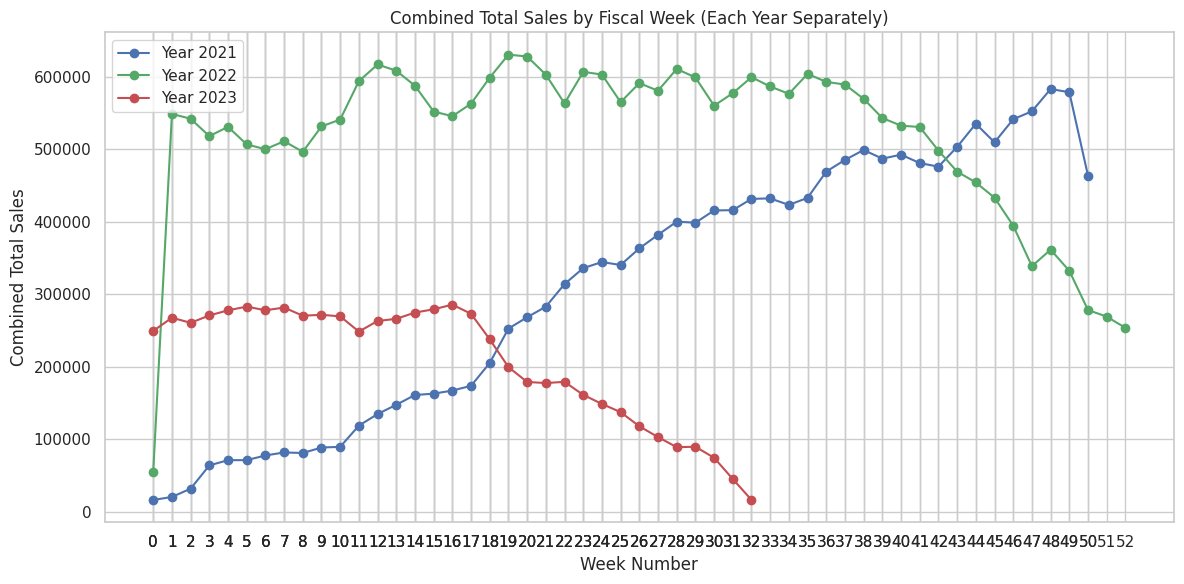

In [ ]:
# Convert the 'calendar.calendar_day_date' column to a datetime format
df_tsdm['calendar.calendar_day_date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])

# Extract the fiscal year and fiscal week from the date column
df_tsdm['Fiscal_Year'] = df_tsdm['calendar.calendar_day_date'].dt.year
df_tsdm['Fiscal_Week'] = df_tsdm['calendar.calendar_day_date'].dt.strftime('%U')

# Group the data by fiscal year and fiscal week, then calculate the total sales for each week
weekly_total_sales = df_tsdm.groupby(['Fiscal_Year', 'Fiscal_Week'])[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']].sum()

# Create a line plot for each fiscal year with specified colors
plt.figure(figsize=(12, 6))

colors = ['b', 'g', 'r']  # Specify custom colors for each year
x_values = []  # Initialize x_values list to accumulate x values

for i, year in enumerate(weekly_total_sales.index.levels[0]):
    data_year = weekly_total_sales.loc[year]
    data_year['Combined_Total_Sales'] = data_year['daily_yoy_ndt.total_inside_sales'] + data_year['daily_yoy_ndt.total_food_service']

    # Plot the combined total sales for the year with the specified color
    x_year = list(range(len(data_year)))
    plt.plot(x_year, data_year['Combined_Total_Sales'], marker='o', linestyle='-', label=f'Year {year}', color=colors[i])

    # Accumulate x values
    x_values += x_year

plt.title('Combined Total Sales by Fiscal Week (Each Year Separately)')
plt.xlabel('Week Number')
plt.ylabel('Combined Total Sales')
plt.legend()
plt.grid(True)

# Set the tick locations
plt.xticks(x_values)

plt.tight_layout()
plt.show()




*For year 2021, Week 48 has the highest Combined Sales*
*For year 2022, Week 19 has the highest Combined Sales*
*For year 2023, Week 16 has the highest Combined Sales*

In [ ]:
# Convert the 'calendar.calendar_day_date' column to datetime if it's not already in datetime format
df_tsdm['calendar.calendar_day_date'] = pd.to_datetime(df_tsdm['calendar.calendar_day_date'])

# Create date-related features
df_tsdm['year'] = df_tsdm['calendar.calendar_day_date'].dt.year
df_tsdm['month'] = df_tsdm['calendar.calendar_day_date'].dt.month
df_tsdm['day'] = df_tsdm['calendar.calendar_day_date'].dt.day
df_tsdm['quarter'] = df_tsdm['calendar.calendar_day_date'].dt.quarter
df_tsdm['day_of_week'] = df_tsdm['calendar.calendar_day_date'].dt.dayofweek  # 0=Monday, 1=Tuesday, ..., 6=Sunday
df_tsdm['is_weekend'] = (df_tsdm['day_of_week'] >= 5).astype(int)  # 1 if it's a weekend, 0 otherwise

# Print the modified DataFrame with new features
print(df_tsdm.head())


   Unnamed: 0 capital_projects.soft_opening_date calendar.calendar_day_date  \
0           1                          6/14/2022                 2022-06-17   
1           2                          6/14/2022                 2022-06-22   
2           3                          6/14/2022                 2022-06-23   
3           4                          6/14/2022                 2022-06-26   
4           5                          6/14/2022                 2022-06-27   

   calendar.fiscal_week_id_for_year  calendar.day_of_week  \
0                                25                     4   
1                                25                     2   
2                                25                     3   
3                                26                     6   
4                                26                     0   

  calendar_information.holiday calendar_information.type_of_day  \
0                         NONE                          WEEKDAY   
1                       

<a class="anchor" id="FIT"></a>
## *3.18 Monthly Aggregated Plot - Total inside sales and Food Service sales*

<Figure size 1200x600 with 0 Axes>

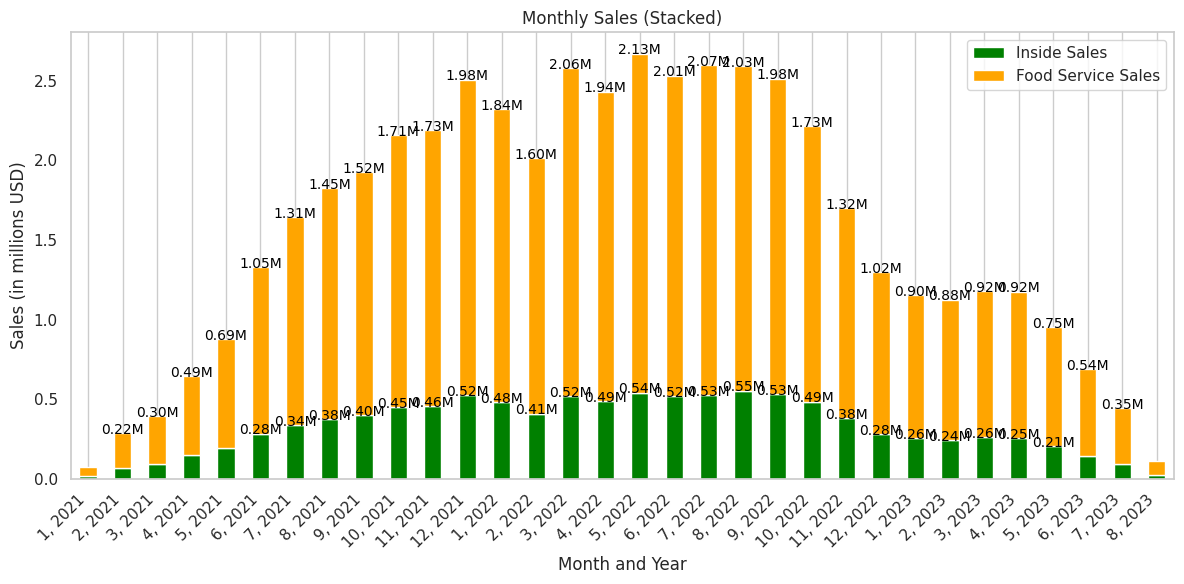

In [ ]:
#Create a stacked bar chart for monthly total inside sales and total food service sales in millions of USD
monthly_sales = df_tsdm.groupby(['year', 'month'])[['daily_yoy_ndt.total_food_service','daily_yoy_ndt.total_inside_sales']].sum() / 1_000_000  # Divide by 1 million
plt.figure(figsize=(12, 6))

# Specify custom colors for the bars
colors = ['green', 'orange']

ax = monthly_sales.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))
plt.title('Monthly Sales (Stacked)')
plt.xlabel('Month and Year')
plt.ylabel('Sales (in millions USD)')
plt.grid(axis='y')

# Annotate data values on top of each bar segment with exact coordinates
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0.2:  # Only annotate bars with significant height
        ax.annotate(f'{height:.2f}M', (x + width/2, y + height + 0.02), ha='center', va='center', fontsize=10, color='black')

# Set custom x-labels using month and year values from the DataFrame
custom_labels = [f'{int(x[1])}, {int(x[0])}' for x in monthly_sales.index]
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels, rotation=45, ha='right')

plt.legend(['Inside Sales', 'Food Service Sales'], loc='upper right')
plt.tight_layout()
plt.show()



*May 2022 has the highest Combined Sales*

**Seasonal Plot: Plot seasonal patterns by aggregating data over seasons or quarters.**

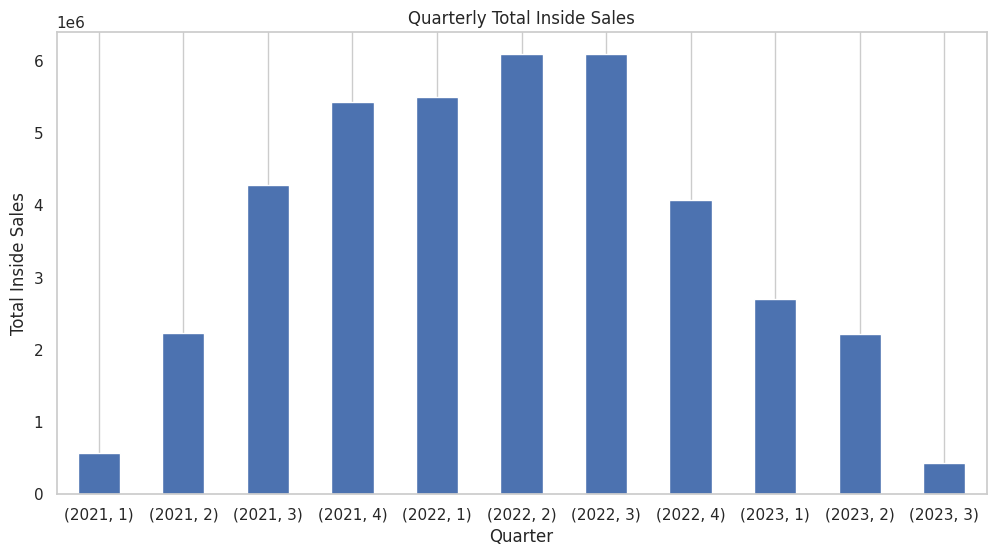

In [ ]:
#Plot quarterly total inside sales
quarterly_sales = df_tsdm.groupby(['year', 'quarter'])['daily_yoy_ndt.total_inside_sales'].sum()
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='bar', rot=0)
plt.title('Quarterly Total Inside Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Inside Sales')
plt.grid(axis='y')
plt.show()



*During 2nd,3rd quarters of Year 2022, sales were found to be highest*

**Box Plot by Day of the Week: Visualize how a feature varies by the day of the week.**



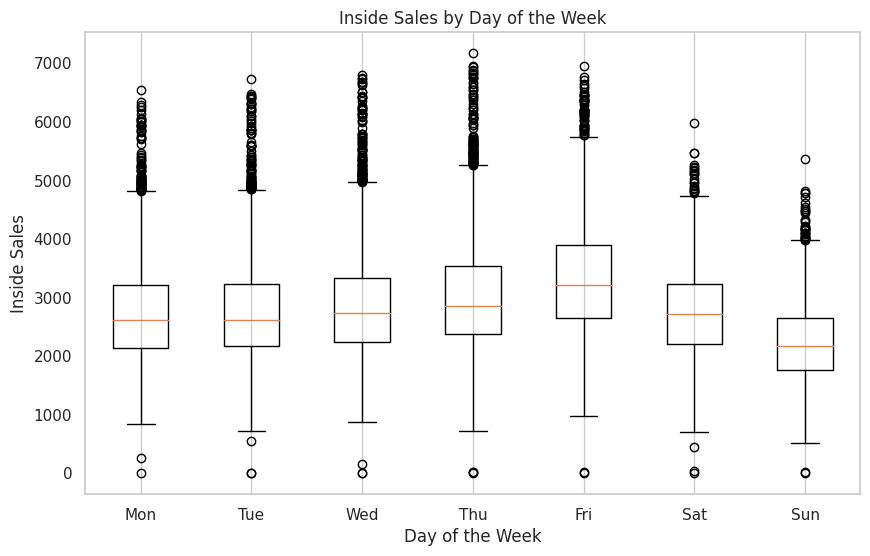

In [ ]:
#Box plot of inside sales by day of the week
plt.figure(figsize=(10, 6))
plt.boxplot([df_tsdm[df_tsdm['day_of_week'] == i]['daily_yoy_ndt.total_inside_sales'] for i in range(7)],
            labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Inside Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Inside Sales')
plt.grid(axis='y')
plt.show()



**Combine Sales of Total Inside and Total Food Service**

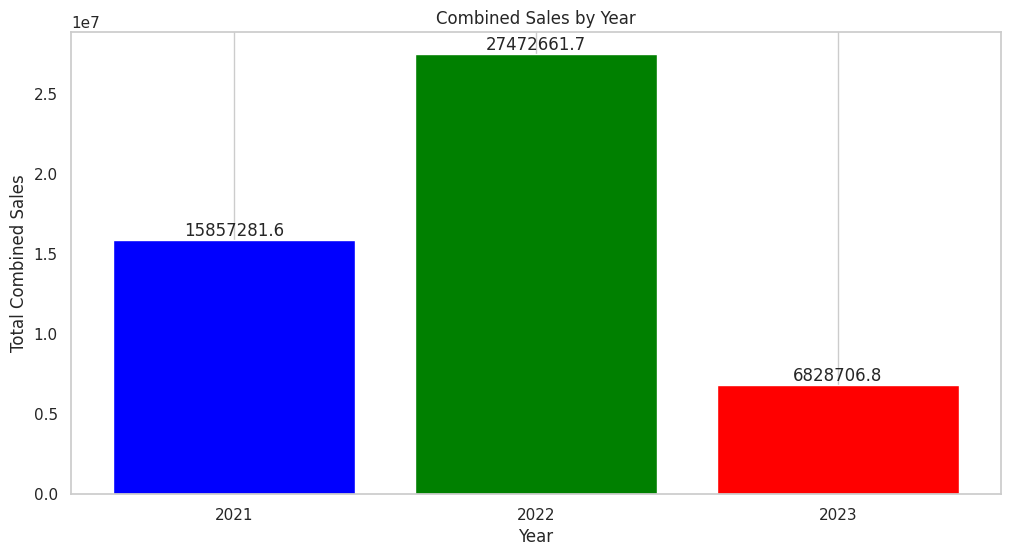

In [ ]:
# Group the data by year and calculate the sum of inside sales and food service sales for each year
yearly_sales = df_tsdm.groupby(df_tsdm['calendar.calendar_day_date'].dt.year)[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']].sum()

# Create a new column for the combined sales
yearly_sales['total_combined_sales'] = yearly_sales['daily_yoy_ndt.total_inside_sales'] + yearly_sales['daily_yoy_ndt.total_food_service']

# Extract years and sales values
years = yearly_sales.index
sales_values = yearly_sales['total_combined_sales']

# Create a bar plot with different colors
colors = ['blue', 'green', 'red']
plt.figure(figsize=(12, 6))
bars = plt.bar(years, sales_values, color=colors)

# Add truncated values on top of each bar
for bar, value in zip(bars, sales_values):
    truncated_value = round(value, 1)  # Truncate to 1 decimal place
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{truncated_value:.1f}', ha='center', va='bottom', fontsize=12)

plt.title('Combined Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Combined Sales')
plt.xticks(years)
plt.grid(axis='y')
plt.show()




##*Frequency Distribution of Day Types*

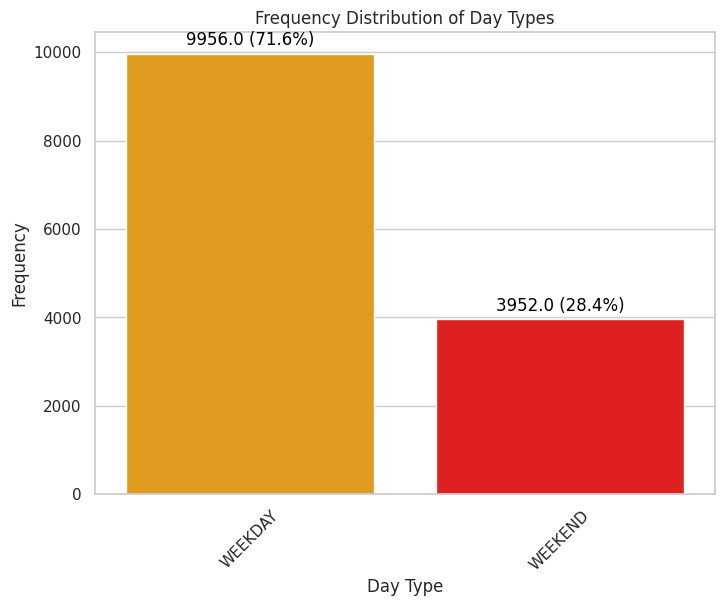

In [ ]:
# Define a color palette for day types
day_type_colors = {'WEEKDAY': 'ORANGE', 'WEEKEND': 'RED'}

# Frequency distribution of day types with different colors
day_type_counts = df_tsdm['calendar_information.type_of_day'].value_counts()
total_days = len(df_tsdm)  # Total number of days

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette=day_type_colors)

# Add count annotations above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({(p.get_height() / total_days) * 100:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Frequency Distribution of Day Types')
plt.xlabel('Day Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



*71.6% of the days are Weekday and 28.4% of the days are Weekends*

**Box Plots by Day Type - Distribution of Sales**

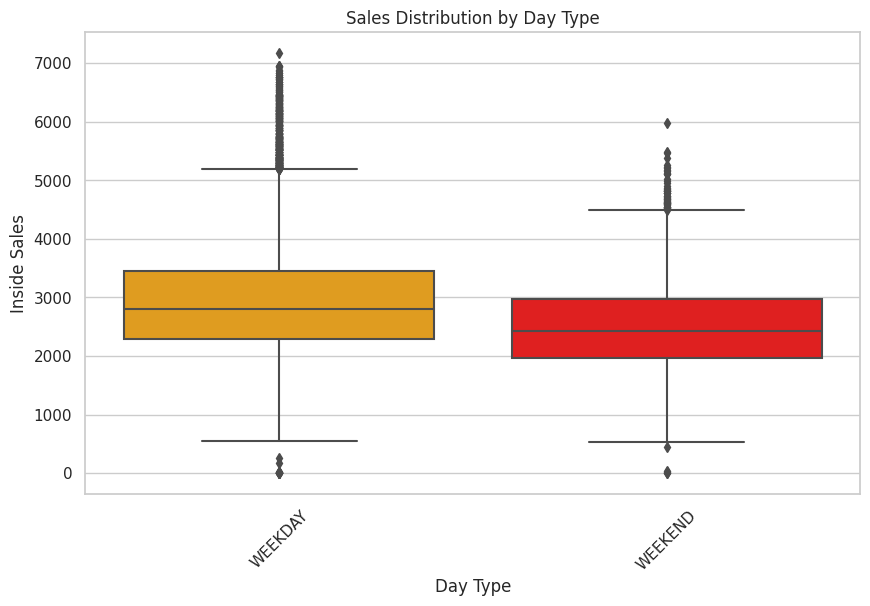

In [ ]:
# Define a color palette for day types
day_type_colors = {'WEEKDAY': 'ORANGE', 'WEEKEND': 'RED'}

# Box plots of sales by day type with different colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='calendar_information.type_of_day', y='daily_yoy_ndt.total_inside_sales', data=df_tsdm, palette=day_type_colors)
plt.title('Sales Distribution by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Inside Sales')
plt.xticks(rotation=45)
plt.show()


<a class="anchor" id="EDAQ"></a>
# *4. EDA- Qualitative Data*


<a class="anchor" id="IMPQ"></a>
## *4.1 Set up, import data, and prepare Qualitative data*

In [ ]:
df_qdm = pd.read_csv("qualitative_data_msba.csv")


In [ ]:
num_columns = df_qdm.shape[1]
print("Number of columns in df_qdm:", num_columns)


Number of columns in df_qdm: 55


In [ ]:
df_qdm.describe()

Unnamed: 0    open_year  square_feet  front_door_count  \
count   37.000000    37.000000     37.00000              37.0   
mean    19.000000  2021.324324   4970.27027               2.0   
std     10.824355     0.474579    575.93121               0.0   
min      1.000000  2021.000000   2933.00000               2.0   
25%     10.000000  2021.000000   5046.00000               2.0   
50%     19.000000  2021.000000   5046.00000               2.0   
75%     28.000000  2022.000000   5046.00000               2.0   
max     37.000000  2022.000000   6134.00000               2.0   

       years_since_last_project  parking_spaces   x1_mile_pop   x1_mile_emp  \
count                 37.000000       37.000000     37.000000     37.000000   
mean                   1.648649       37.405405   6703.567568   4757.648649   
std                    0.483978        5.918237   5694.011350   4697.168291   
min                    1.000000       23.000000      0.000000     56.000000   
25%                    1.000000       34.000000   1984.000000   1771.000000   
50%                    2.000000       38.000000   5574.000000   3895.000000   
75%                    2.000000       41.000000  11269.000000   6002.000000   
max                    2.000000       49.000000  18692.000000  26077.000000   

       x1_mile_income  x1_2_mile_pop  ...  \
count       37.000000      37.000000  ...   
mean     53300.378378    1833.108108  ...   
std      24333.027254    1915.140476  ...   
min          0.000000       0.000000  ...   
25%      39538.000000     262.000000  ...   
50%      46356.000000    1003.000000  ...   
75%      73519.000000    2686.000000  ...   
max     110957.000000    5923.000000  ...   

       traditional_forecourt_fueling_positions  rv_lanes_fueling_positions  \
count                                37.000000                   37.000000   
mean                                 14.270270                    2.513514   
std                                   3.948619                    2.049683   
min                                  10.000000                    0.000000   
25%                                  12.000000                    0.000000   
50%                                  12.000000                    4.000000   
75%                                  16.000000                    4.000000   
max                                  24.000000                    6.000000   

       hi_flow_lanes_fueling_positions  hi_flow_lanes_fueling_positions_2  \
count                        37.000000                          37.000000   
mean                          3.324324                           3.324324   
std                           2.925501                           2.925501   
min                           0.000000                           0.000000   
25%                           0.000000                           0.000000   
50%                           5.000000                           5.000000   
75%                           5.000000                           5.000000   
max                           9.000000                           9.000000   

       rv_lanes_fueling_positions_2  mens_toilet_count  mens_urinal_count  \
count                     37.000000          37.000000          37.000000   
mean                       2.513514           2.378378           2.351351   
std                        2.049683           0.923500           0.856875   
min                        0.000000           0.000000           0.000000   
25%                        0.000000           2.000000           2.000000   
50%                        4.000000           2.000000           2.000000   
75%                        4.000000           3.000000           3.000000   
max                        6.000000           5.000000           5.000000   

       womens_toilet_count  womens_sink_count  site_id_msba  
count            37.000000          37.000000     37.000000  
mean              4.648649           1.702703  23040.405405  
std               1.751447

<a class="anchor" id="MISSQ"></a>
## *4.2 Columns with Missing values*


In [ ]:
# Check for null values in the Qualitative DataFrame
null_values_qualitative = df_qdm.isnull().sum()

# Display the columns with null values and their counts
print("Null Values in Qualitative DataFrame:")
print(null_values_qualitative[null_values_qualitative > 0])

Null Values in Qualitative DataFrame:
rv_lanes_layout                14
rv_lanes_stack_type            14
hi_flow_lanes_layout           15
hi_flow_lanes_stack_type       15
hi_flow_rv_lanes_layout        14
hi_flow_rv_lanes_stack_type    14
dtype: int64


In [ ]:
#Check for Unique values in the columns with Missing values
print('rv_lanes_layout Unique values: ', df_qdm['rv_lanes_layout'].unique())
print('rv_lanes_stack_type Unique values: ', df_qdm['rv_lanes_stack_type'].unique())
print('hi_flow_lanes_layout Unique values: ', df_qdm['hi_flow_lanes_layout'].unique())
print('hi_flow_lanes_stack_type Unique values: ', df_qdm['hi_flow_lanes_stack_type'].unique())
print('hi_flow_rv_lanes_layout Unique values: ', df_qdm['hi_flow_rv_lanes_layout'].unique())
print('hi_flow_rv_lanes_stack_type Unique values: ', df_qdm['hi_flow_rv_lanes_stack_type'].unique())

rv_lanes_layout Unique values:  ['Stack' 'In-Line' nan]
rv_lanes_stack_type Unique values:  ['HF/RV' 'None' nan]
hi_flow_lanes_layout Unique values:  ['Stack' 'Combo' nan]
hi_flow_lanes_stack_type Unique values:  ['HF/RV' nan]
hi_flow_rv_lanes_layout Unique values:  ['Stack' 'Combo' 'In-Line' nan]
hi_flow_rv_lanes_stack_type Unique values:  ['HF/RV' 'None' nan]


Since the missing values are mostly categorical and can be interpreted as not present. We are imputing a new 'Not Present' Category in place of null values. Since the 'rv_lanes_stack_type' and 'hi_flow_rv_lanes_stack_type' already have the 'None' Category, we will impute the missing values in this columns with 'None' instead of 'Not Present'.


<a class="anchor" id="MISSQ2"></a>
## *4.3 Imputing Missing Values*

In [ ]:
#Imputing Missing values with 'None' and 'Not Present' categories
df_qdm['rv_lanes_stack_type'] = df_qdm['rv_lanes_stack_type'].fillna('None')
df_qdm['hi_flow_rv_lanes_stack_type'] = df_qdm['hi_flow_rv_lanes_stack_type'].fillna('None')
df_qdm = df_qdm.fillna('Not Present')

In [ ]:
df_qdm.isnull().sum()

NameError: ignored

<a class="anchor" id="var"></a>
## *4.4 Finding variability of columns*


In [ ]:
unique_counts = df_qdm.nunique()

# Sort the unique counts in descending order
unique_counts = unique_counts.sort_values(ascending=False)

# Print the number of unique values for each column in descending order
print(unique_counts)



Unnamed: 0                                 37
x1_mile_pop                                37
x7_min_inc                                 37
x7_min_emp                                 37
x7_min_pop                                 37
x5_min_emp                                 37
x5_min_pop                                 37
x1_mile_emp                                37
x1_2_mile_emp                              37
site_id_msba                               37
x5_min_inc                                 36
x1_mile_income                             36
x1_2_mile_pop                              35
x1_2_mile_income                           33
parking_spaces                             21
square_feet                                 9
hi_flow_lanes_fueling_positions_2           6
hi_flow_lanes_fueling_positions             6
mens_toilet_count                           6
womens_toilet_count                         6
traditional_forecourt_fueling_positions     6
rv_lanes_fueling_positions_2      

<a class="anchor" id="dout"></a>
## *4.5 Detecting Outliers*

In [ ]:
from scipy import stats


# Select the columns to check for outliers (e.g., numerical columns)
numerical_columns = df_qdm.select_dtypes(include=['int64', 'float64'])

# Define a threshold for outliers
threshold = 3

# Create a DataFrame to store the z-scores
z_scores_df = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()

# Calculate the number of outliers in each column
outliers_count = (z_scores_df.abs() > threshold).sum()

# Display the number of outliers in each column
print("Number of outliers in each column:")
print(outliers_count)


Number of outliers in each column:
Unnamed: 0                                 0
open_year                                  0
square_feet                                2
front_door_count                           0
years_since_last_project                   0
parking_spaces                             0
x1_mile_pop                                0
x1_mile_emp                                1
x1_mile_income                             0
x1_2_mile_pop                              0
x1_2_mile_emp                              1
x1_2_mile_income                           0
x5_min_pop                                 1
x5_min_emp                                 0
x5_min_inc                                 0
x7_min_pop                                 1
x7_min_emp                                 2
x7_min_inc                                 0
traditional_forecourt_fueling_positions    0
rv_lanes_fueling_positions                 0
hi_flow_lanes_fueling_positions            0
hi_flow_lanes_fuelin

In [ ]:
unique_site_id_count = df_tsdm['site_id_msba'].nunique()

# Print the count of unique site IDs
print("Count of unique site IDs:", unique_site_id_count)


# Get the unique site IDs
unique_site_ids = df_tsdm['site_id_msba'].unique()

# Print the unique site IDs
print(unique_site_ids)


Count of unique site IDs: 38
[24535 24255 24220 24150 23905 23835 23765 23730 23660 23555 23485 23450
 23415 23380 23345 23240 23135 23065 22925 22890 22855 22820 22785 22750
 22715 22680 22645 22575 22540 22505 22400 22330 22260 22120 22085 22015
 21980 21560]


In [ ]:
df_qdm.describe()

Unnamed: 0    open_year  square_feet  front_door_count  \
count   37.000000    37.000000     37.00000              37.0   
mean    19.000000  2021.324324   4970.27027               2.0   
std     10.824355     0.474579    575.93121               0.0   
min      1.000000  2021.000000   2933.00000               2.0   
25%     10.000000  2021.000000   5046.00000               2.0   
50%     19.000000  2021.000000   5046.00000               2.0   
75%     28.000000  2022.000000   5046.00000               2.0   
max     37.000000  2022.000000   6134.00000               2.0   

       years_since_last_project  parking_spaces   x1_mile_pop   x1_mile_emp  \
count                 37.000000       37.000000     37.000000     37.000000   
mean                   1.648649       37.405405   6703.567568   4757.648649   
std                    0.483978        5.918237   5694.011350   4697.168291   
min                    1.000000       23.000000      0.000000     56.000000   
25%                    1.000000       34.000000   1984.000000   1771.000000   
50%                    2.000000       38.000000   5574.000000   3895.000000   
75%                    2.000000       41.000000  11269.000000   6002.000000   
max                    2.000000       49.000000  18692.000000  26077.000000   

       x1_mile_income  x1_2_mile_pop  ...  \
count       37.000000      37.000000  ...   
mean     53300.378378    1833.108108  ...   
std      24333.027254    1915.140476  ...   
min          0.000000       0.000000  ...   
25%      39538.000000     262.000000  ...   
50%      46356.000000    1003.000000  ...   
75%      73519.000000    2686.000000  ...   
max     110957.000000    5923.000000  ...   

       traditional_forecourt_fueling_positions  rv_lanes_fueling_positions  \
count                                37.000000                   37.000000   
mean                                 14.270270                    2.513514   
std                                   3.948619                    2.049683   
min                                  10.000000                    0.000000   
25%                                  12.000000                    0.000000   
50%                                  12.000000                    4.000000   
75%                                  16.000000                    4.000000   
max                                  24.000000                    6.000000   

       hi_flow_lanes_fueling_positions  hi_flow_lanes_fueling_positions_2  \
count                        37.000000                          37.000000   
mean                          3.324324                           3.324324   
std                           2.925501                           2.925501   
min                           0.000000                           0.000000   
25%                           0.000000                           0.000000   
50%                           5.000000                           5.000000   
75%                           5.000000                           5.000000   
max                           9.000000                           9.000000   

       rv_lanes_fueling_positions_2  mens_toilet_count  mens_urinal_count  \
count                     37.000000          37.000000          37.000000   
mean                       2.513514           2.378378           2.351351   
std                        2.049683           0.923500           0.856875   
min                        0.000000           0.000000           0.000000   
25%                        0.000000           2.000000           2.000000   
50%                        4.000000           2.000000           2.000000   
75%                        4.000000           3.000000           3.000000   
max                        6.000000           5.000000           5.000000   

       womens_toilet_count  womens_sink_count  site_id_msba  
count            37.000000          37.000000     37.000000  
mean              4.648649           1.702703  23040.405405  
std               1.751447

In [ ]:
df_tsdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          13908 non-null  int64         
 1   capital_projects.soft_opening_date  13908 non-null  object        
 2   calendar.calendar_day_date          13908 non-null  datetime64[ns]
 3   calendar.fiscal_week_id_for_year    13908 non-null  int64         
 4   calendar.day_of_week                13908 non-null  int64         
 5   calendar_information.holiday        13908 non-null  object        
 6   calendar_information.type_of_day    13908 non-null  object        
 7   daily_yoy_ndt.total_inside_sales    13908 non-null  float64       
 8   daily_yoy_ndt.total_food_service    13908 non-null  float64       
 9   diesel                              13908 non-null  float64       
 10  unleaded              

<a class="anchor" id="var2"></a>
## *4.6 Separate variables into categorical and continuous*


In [ ]:
# Separate variables into categorical and continuous
categorical_vars = ['lottery', 'freal', 'bonfire_grill', 'pizza', 'cinnabon', 'ethanol_free', 'hi_flow_lanes', 'rv_lanes', 'cat_scales', 'rv_dumps', 'propane', 'traditional_forecourt_layout', 'traditional_forecourt_stack_type', 'rv_lanes_layout', 'rv_lanes_stack_type', 'hi_flow_lanes_layout', 'hi_flow_rv_lanes_layout']  # List to store categorical variable names
continuous_vars = ['open_year', 'years_since_last_project', 'lottery','square_feet', 'parking_spaces', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income', 'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop', 'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc', 'traditional_forecourt_fueling_positions', 'rv_lanes_fueling_positions', 'hi_flow_lanes_fueling_positions', 'mens_toilet_count', 'mens_urinal_count', 'womens_toilet_count', 'womens_sink_count', 'site_id_msba']   # List to store continuous variable names


# Print the lists of categorical and continuous variables
print("Categorical Variables:")
print(categorical_vars)

print("\nContinuous Variables:")
print(continuous_vars)


Categorical Variables:
['lottery', 'freal', 'bonfire_grill', 'pizza', 'cinnabon', 'ethanol_free', 'hi_flow_lanes', 'rv_lanes', 'cat_scales', 'rv_dumps', 'propane', 'traditional_forecourt_layout', 'traditional_forecourt_stack_type', 'rv_lanes_layout', 'rv_lanes_stack_type', 'hi_flow_lanes_layout', 'hi_flow_rv_lanes_layout']

Continuous Variables:
['open_year', 'years_since_last_project', 'lottery', 'square_feet', 'parking_spaces', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income', 'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop', 'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc', 'traditional_forecourt_fueling_positions', 'rv_lanes_fueling_positions', 'hi_flow_lanes_fueling_positions', 'mens_toilet_count', 'mens_urinal_count', 'womens_toilet_count', 'womens_sink_count', 'site_id_msba']


In [ ]:
df_qdm['open_year'].value_counts()

2021    25
2022    12
Name: open_year, dtype: int64

In [ ]:
num_columns = df_qdm.shape[1]
print("Number of columns in df_qdm:", num_columns)

Number of columns in df_qdm: 55


In [ ]:
df_qdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               37 non-null     int64 
 1   open_year                                37 non-null     int64 
 2   square_feet                              37 non-null     int64 
 3   front_door_count                         37 non-null     int64 
 4   years_since_last_project                 37 non-null     int64 
 5   parking_spaces                           37 non-null     int64 
 6   lottery                                  37 non-null     object
 7   freal                                    37 non-null     object
 8   bonfire_grill                            37 non-null     object
 9   pizza                                    37 non-null     object
 10  cinnabon                                 37 non-null     object


In [ ]:
df_qdm.describe()

Unnamed: 0    open_year  square_feet  front_door_count  \
count   37.000000    37.000000     37.00000              37.0   
mean    19.000000  2021.324324   4970.27027               2.0   
std     10.824355     0.474579    575.93121               0.0   
min      1.000000  2021.000000   2933.00000               2.0   
25%     10.000000  2021.000000   5046.00000               2.0   
50%     19.000000  2021.000000   5046.00000               2.0   
75%     28.000000  2022.000000   5046.00000               2.0   
max     37.000000  2022.000000   6134.00000               2.0   

       years_since_last_project  parking_spaces   x1_mile_pop   x1_mile_emp  \
count                 37.000000       37.000000     37.000000     37.000000   
mean                   1.648649       37.405405   6703.567568   4757.648649   
std                    0.483978        5.918237   5694.011350   4697.168291   
min                    1.000000       23.000000      0.000000     56.000000   
25%                    1.000000       34.000000   1984.000000   1771.000000   
50%                    2.000000       38.000000   5574.000000   3895.000000   
75%                    2.000000       41.000000  11269.000000   6002.000000   
max                    2.000000       49.000000  18692.000000  26077.000000   

       x1_mile_income  x1_2_mile_pop  ...  \
count       37.000000      37.000000  ...   
mean     53300.378378    1833.108108  ...   
std      24333.027254    1915.140476  ...   
min          0.000000       0.000000  ...   
25%      39538.000000     262.000000  ...   
50%      46356.000000    1003.000000  ...   
75%      73519.000000    2686.000000  ...   
max     110957.000000    5923.000000  ...   

       traditional_forecourt_fueling_positions  rv_lanes_fueling_positions  \
count                                37.000000                   37.000000   
mean                                 14.270270                    2.513514   
std                                   3.948619                    2.049683   
min                                  10.000000                    0.000000   
25%                                  12.000000                    0.000000   
50%                                  12.000000                    4.000000   
75%                                  16.000000                    4.000000   
max                                  24.000000                    6.000000   

       hi_flow_lanes_fueling_positions  hi_flow_lanes_fueling_positions_2  \
count                        37.000000                          37.000000   
mean                          3.324324                           3.324324   
std                           2.925501                           2.925501   
min                           0.000000                           0.000000   
25%                           0.000000                           0.000000   
50%                           5.000000                           5.000000   
75%                           5.000000                           5.000000   
max                           9.000000                           9.000000   

       rv_lanes_fueling_positions_2  mens_toilet_count  mens_urinal_count  \
count                     37.000000          37.000000          37.000000   
mean                       2.513514           2.378378           2.351351   
std                        2.049683           0.923500           0.856875   
min                        0.000000           0.000000           0.000000   
25%                        0.000000           2.000000           2.000000   
50%                        4.000000           2.000000           2.000000   
75%                        4.000000           3.000000           3.000000   
max                        6.000000           5.000000           5.000000   

       womens_toilet_count  womens_sink_count  site_id_msba  
count            37.000000          37.000000     37.000000  
mean              4.648649           1.702703  23040.405405  
std               1.751447

<a class="anchor" id="visq"></a>
## *4.7 Visualizing Qualitative Features*

In [ ]:
# Group the data by 'site_id' and find the maximum and minimum square footage
max_square_footage = df_qdm.groupby('site_id_msba')['square_feet'].max()
min_square_footage = df_qdm.groupby('site_id_msba')['square_feet'].min()

# Find the site_id with the highest and lowest square footage
site_id_with_max_square_footage = max_square_footage.idxmax()
site_id_with_min_square_footage = min_square_footage.idxmin()

# Get the actual values of square footage
highest_square_footage = max_square_footage.max()
lowest_square_footage = min_square_footage.min()

# Print the results
print(f"Site ID with the highest square footage: {site_id_with_max_square_footage}")
print(f"Highest square footage: {highest_square_footage} square feet")

print(f"Site ID with the lowest square footage: {site_id_with_min_square_footage}")
print(f"Lowest square footage: {lowest_square_footage} square feet")

Site ID with the highest square footage: 22890
Highest square footage: 6134 square feet
Site ID with the lowest square footage: 24150
Lowest square footage: 2933 square feet


<ipython-input-54-bb2319f1d611>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



<Figure size 1200x600 with 0 Axes>

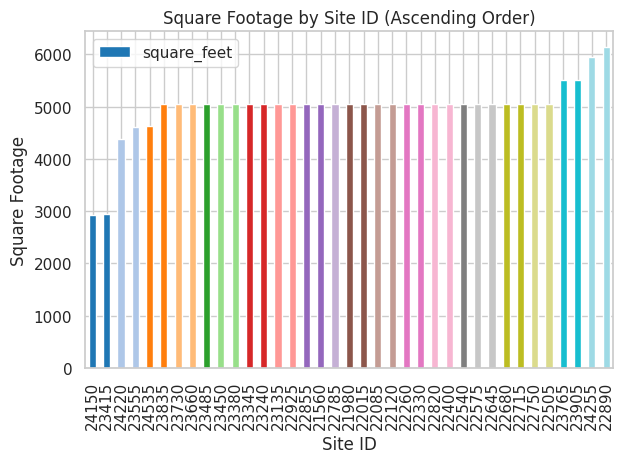

In [ ]:
# Sort the DataFrame by 'square_feet' in ascending order
df_qdm_sorted = df_qdm.sort_values(by='square_feet')

# Create a color palette with a different color for each site_id
color_palette = plt.cm.get_cmap('tab20', len(df_qdm_sorted))

# Create a bar chart of square footage in ascending order with different colors
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use 'site_id_msba' as the x-axis and 'square_feet' as the y-axis
# Specify the color for each bar based on the color_palette
df_qdm_sorted.plot(kind='bar', x='site_id_msba', y='square_feet', color=[color_palette(i) for i in range(len(df_qdm_sorted))])

plt.xlabel('Site ID')
plt.ylabel('Square Footage')
plt.title('Square Footage by Site ID (Ascending Order)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the bar chart
plt.show()


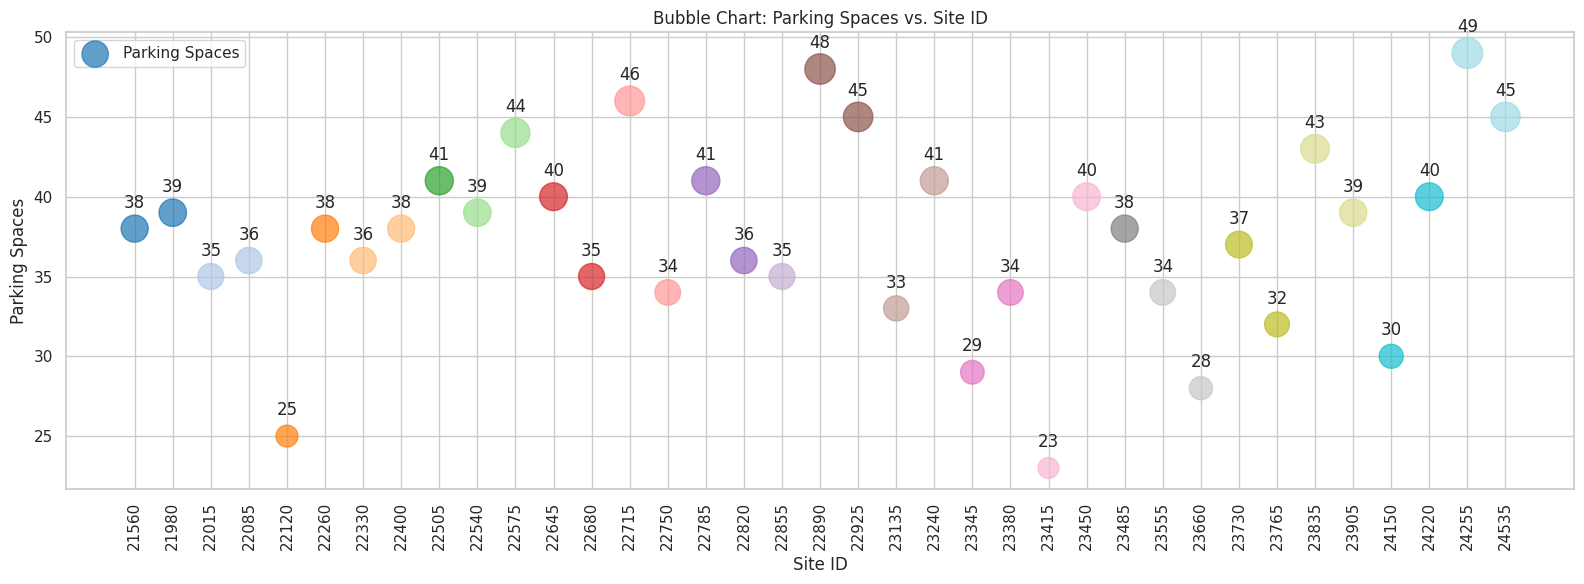

In [ ]:
# Group the data by 'site_id_msba' and calculate the total parking spaces for each site
site_parking_spaces = df_qdm.groupby('site_id_msba')['parking_spaces'].sum()

# Create a figure with a size that accommodates all site IDs
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Create an array of x-values for each site ID
x_values = np.arange(len(site_parking_spaces))

# Generate different colors for the bubbles using the 'tab20' colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(site_parking_spaces)))

# Scatter plot with site IDs, parking spaces, and customized bubble sizes and colors
plt.scatter(x_values,  # X-values for site IDs
            site_parking_spaces.values,  # Bubble sizes based on parking spaces
            s=site_parking_spaces.values * 10,  # Customize bubble sizes (multiplied by 3 for larger size)
            c=colors,  # Use the generated colors
            alpha=0.7,  # Transparency
            label='Parking Spaces')

# Set x-axis labels to be the site IDs
plt.xticks(x_values, site_parking_spaces.index, rotation=90)  # Rotate x-axis labels for readability

# Add labels to the bubbles (optional)
for x, spaces in zip(x_values, site_parking_spaces.values):
    plt.annotate(spaces,
                 (x, spaces),  # Coordinates of the bubble
                 textcoords="offset points",
                 xytext=(0, 15),  # Adjust the distance from the bubble
                 ha='center')

# Customize plot labels and title
plt.xlabel('Site ID')
plt.ylabel('Parking Spaces')
plt.title('Bubble Chart: Parking Spaces vs. Site ID')

# Show legend
plt.legend()

# Display the bubble chart with distinct colors
plt.tight_layout()
plt.show()


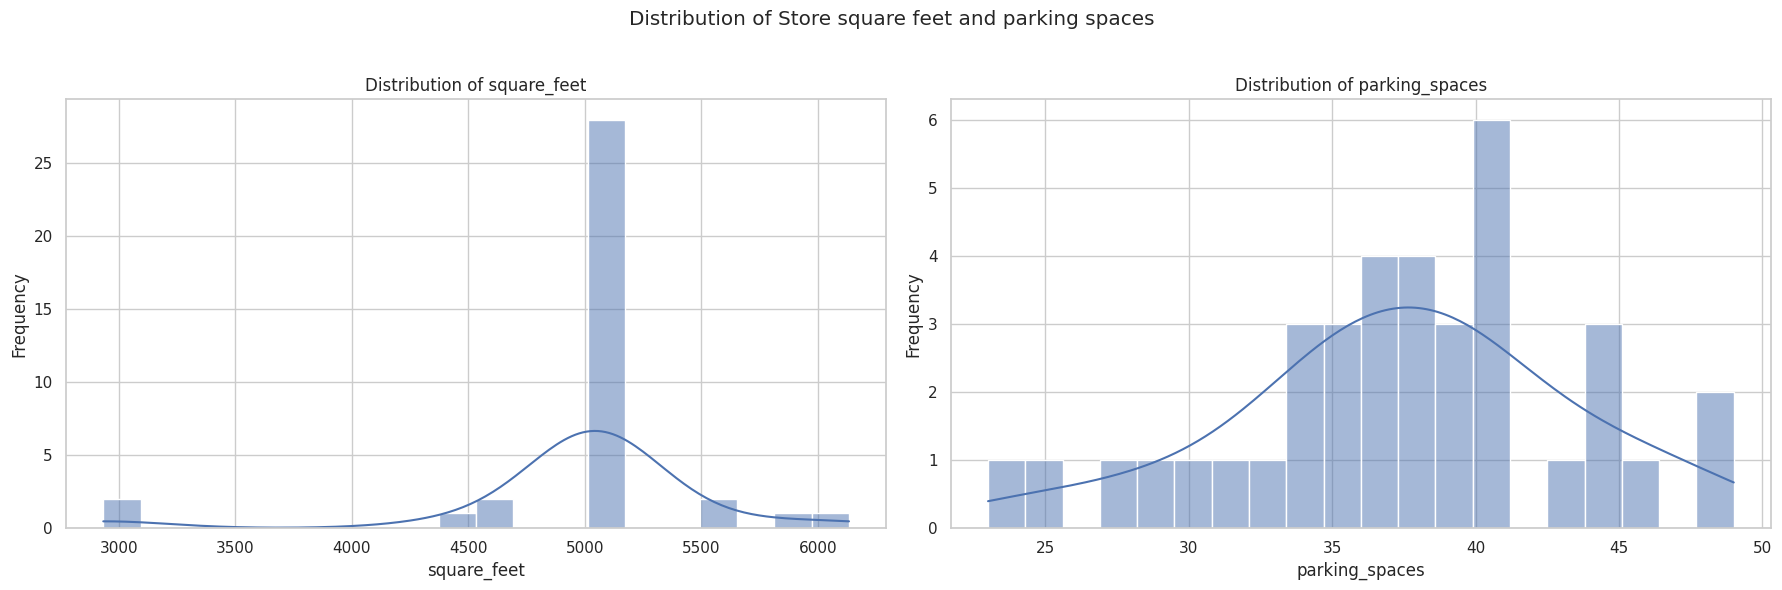

In [ ]:
# Define a list of qualitative features to be plotted
qualitative_features = ['square_feet', 'parking_spaces']

# Create a subplot grid of 1 row and 2 columns, with a specific size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Set the overall title for the figure
fig.suptitle('Distribution of Store square feet and parking spaces')

# Loop through each feature in the 'qualitative_features' list
for i, col in enumerate(qualitative_features):
    # Create a histogram plot for each feature using Seaborn's 'histplot'
    # It uses 20 bins and also plots a Kernel Density Estimation (kde)
    sns.histplot(df_qdm[col], bins=20, kde=True, ax=axes[i])

    # Set the title for each subplot
    axes[i].set_title(f'Distribution of {col}')

    # Set the x-axis label for each subplot
    axes[i].set_xlabel(col)

    # Set the y-axis label for each subplot
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap and set the rectangle dimensions for tight_layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


**Square Feet:** The distribution of the store size appears to be right-skewed, indicating that most stores are smaller in size.

**Parking Spaces:** This variable also shows a slight right-skewed distribution, suggesting that most stores have fewer parking spaces.

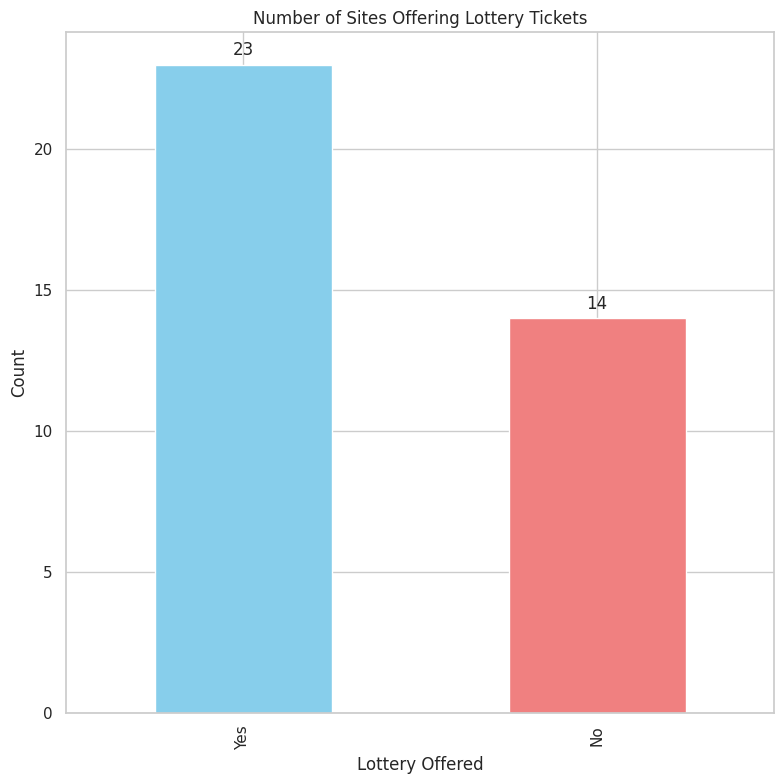

In [ ]:
# Count the number of 'Yes' and 'No' entries in the 'lottery' column
lottery_counts = df_qdm['lottery'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 8))
ax = lottery_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

# Customize plot labels and title
plt.xlabel('Lottery Offered')
plt.ylabel('Count')
plt.title('Number of Sites Offering Lottery Tickets')

# Annotate the values on top of the bars
for i, v in enumerate(lottery_counts):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
print("Categorical Variables:")
print(categorical_vars)

print("\nContinuous Variables:")
print(continuous_vars)

Categorical Variables:
['lottery', 'freal', 'bonfire_grill', 'pizza', 'cinnabon', 'ethanol_free', 'hi_flow_lanes', 'rv_lanes', 'cat_scales', 'rv_dumps', 'propane', 'traditional_forecourt_layout', 'traditional_forecourt_stack_type', 'rv_lanes_layout', 'rv_lanes_stack_type', 'hi_flow_lanes_layout', 'hi_flow_rv_lanes_layout']

Continuous Variables:
['open_year', 'years_since_last_project', 'lottery', 'square_feet', 'parking_spaces', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income', 'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop', 'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc', 'traditional_forecourt_fueling_positions', 'rv_lanes_fueling_positions', 'hi_flow_lanes_fueling_positions', 'mens_toilet_count', 'mens_urinal_count', 'womens_toilet_count', 'womens_sink_count', 'site_id_msba']


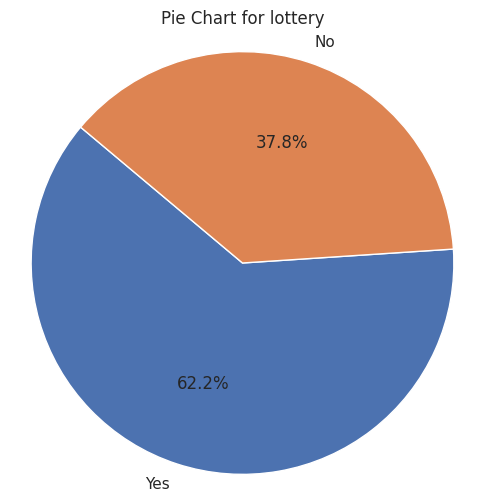

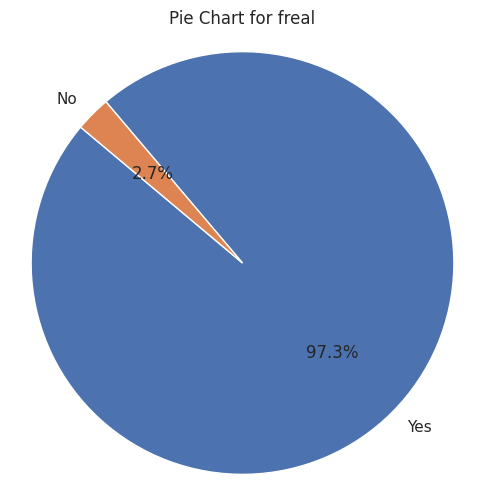

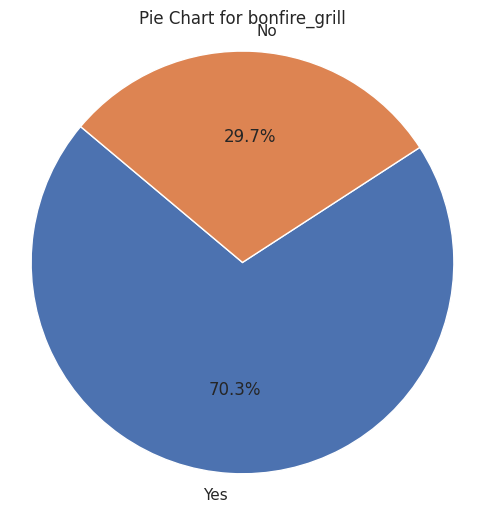

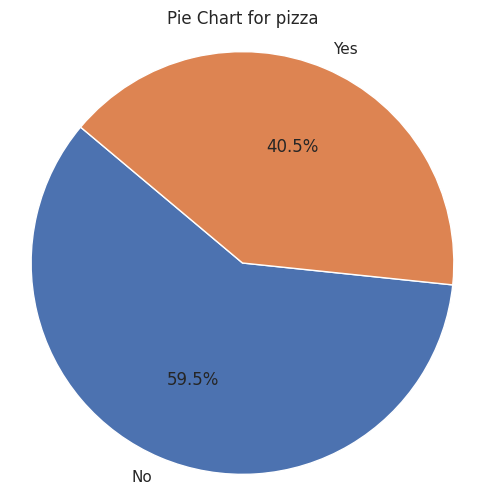

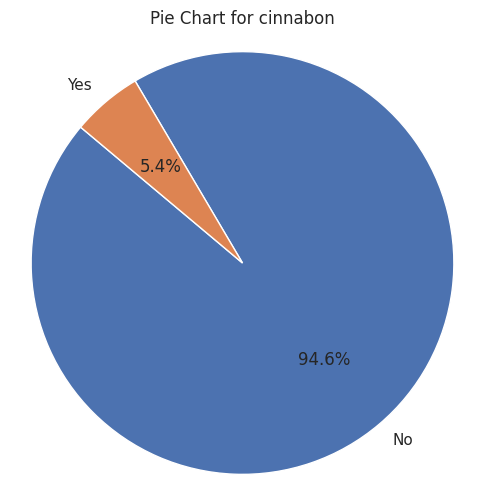

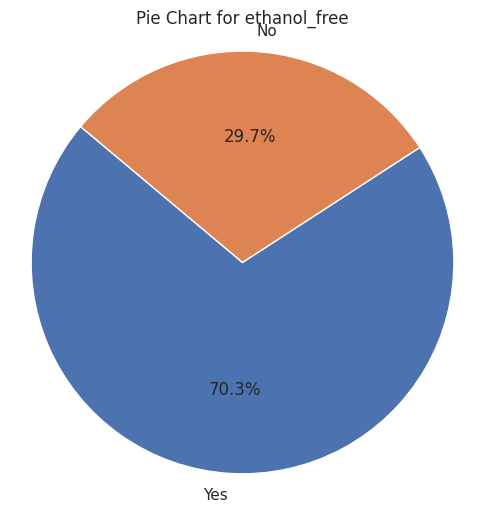

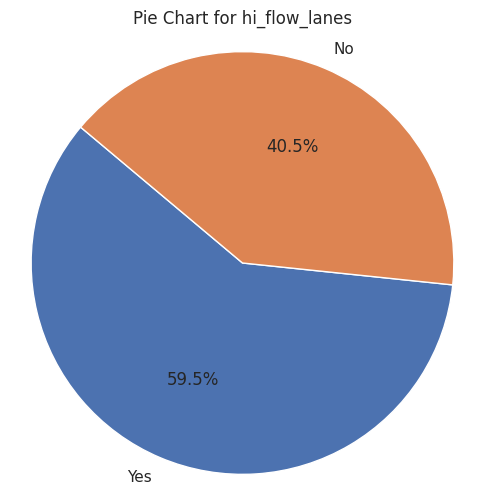

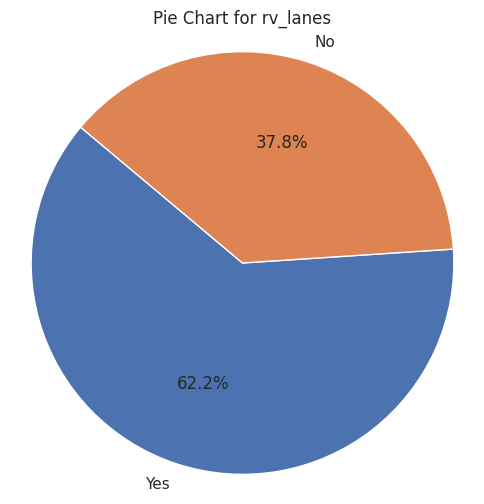

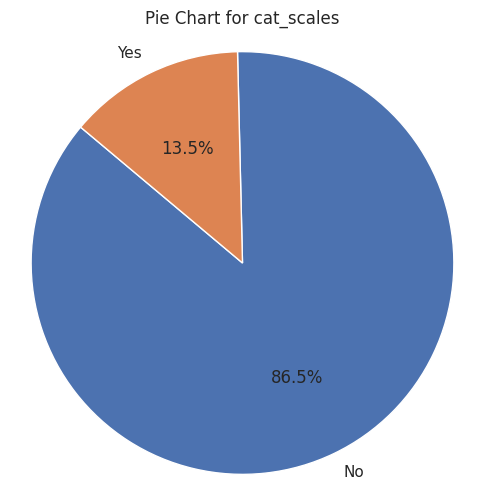

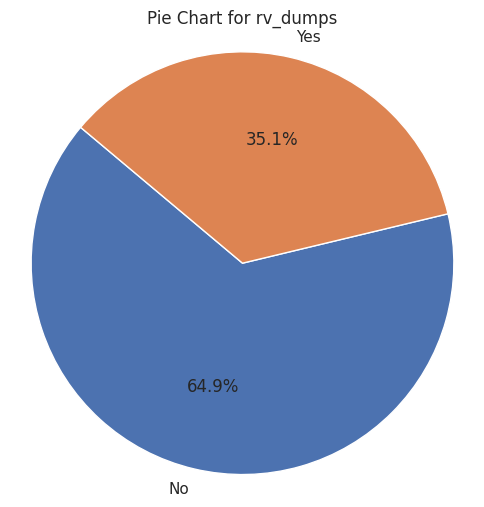

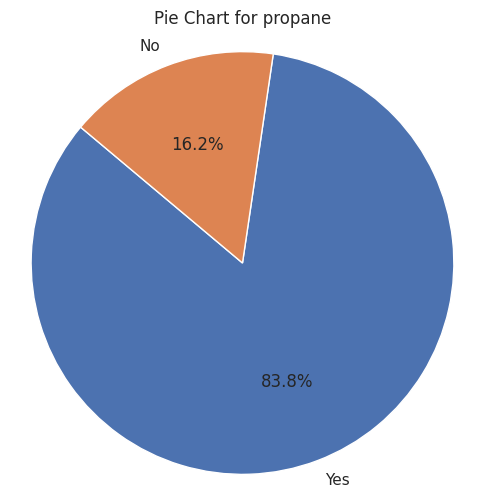

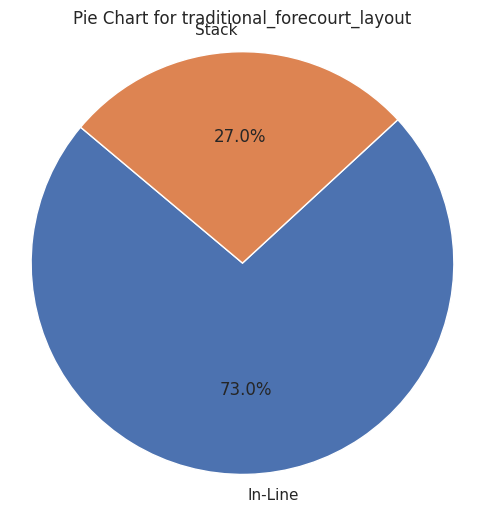

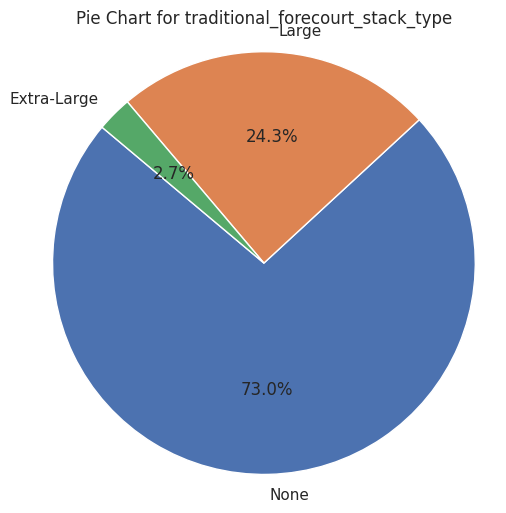

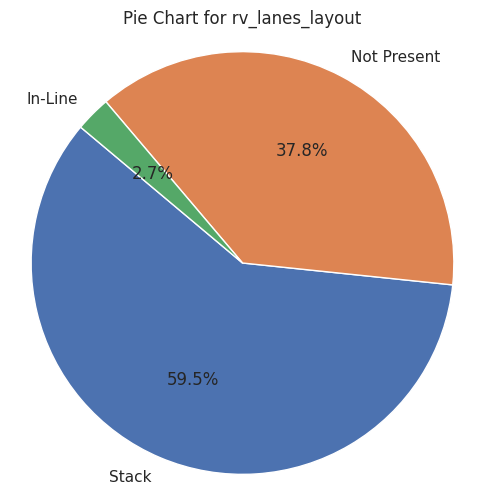

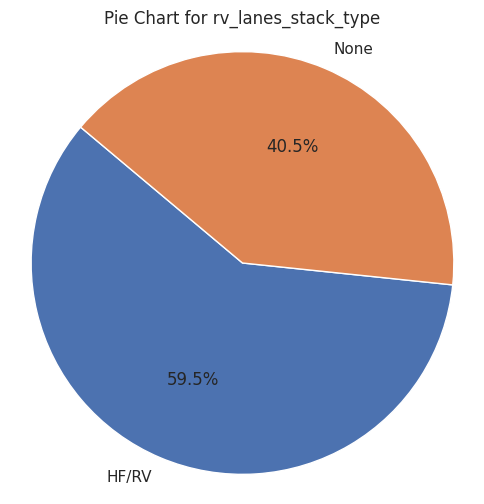

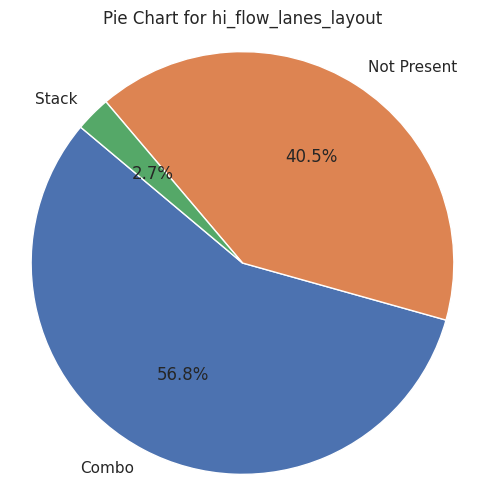

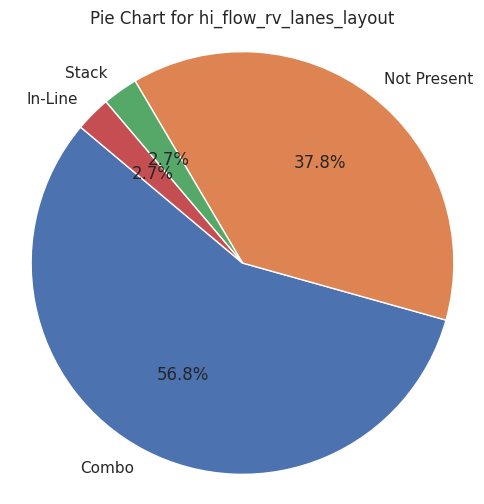

In [ ]:
# Create pie charts for each categorical column
for column in categorical_vars:
    if column in df_qdm.columns:
        # Count the frequency of each category in the column
        category_counts = df_qdm[column].value_counts()

        # Plot a pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title(f'Pie Chart for {column}')

        # Show the pie chart
        plt.show()



In [ ]:
df_qdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               37 non-null     int64 
 1   open_year                                37 non-null     int64 
 2   square_feet                              37 non-null     int64 
 3   front_door_count                         37 non-null     int64 
 4   years_since_last_project                 37 non-null     int64 
 5   parking_spaces                           37 non-null     int64 
 6   lottery                                  37 non-null     object
 7   freal                                    37 non-null     object
 8   bonfire_grill                            37 non-null     object
 9   pizza                                    37 non-null     object
 10  cinnabon                                 37 non-null     object


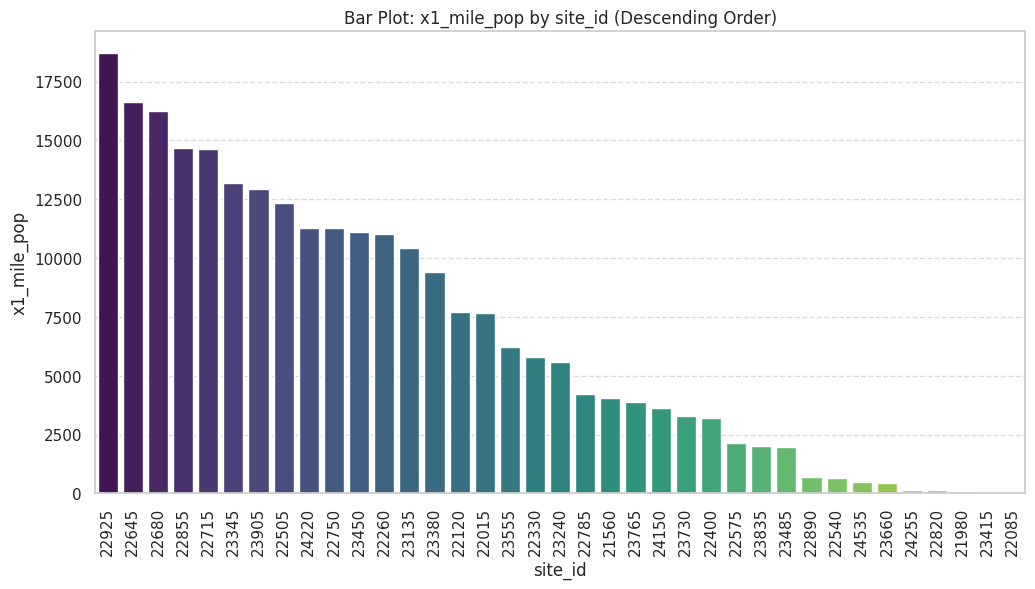

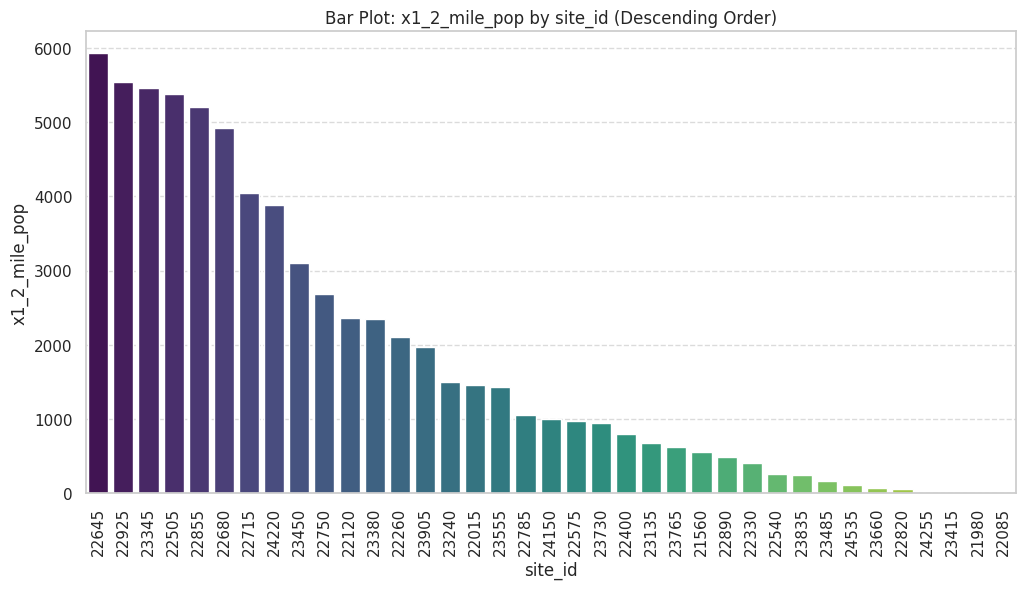

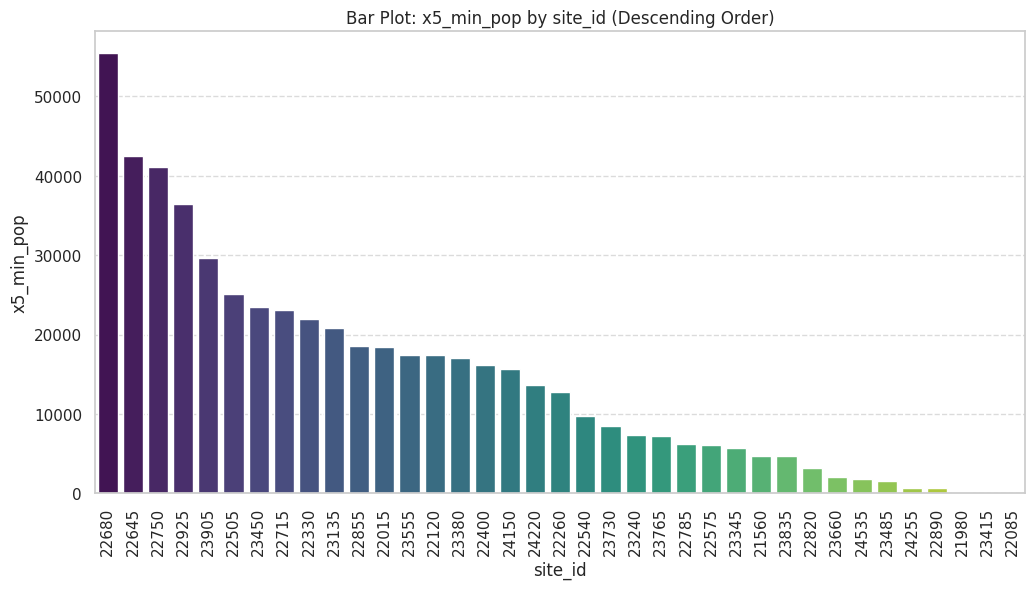

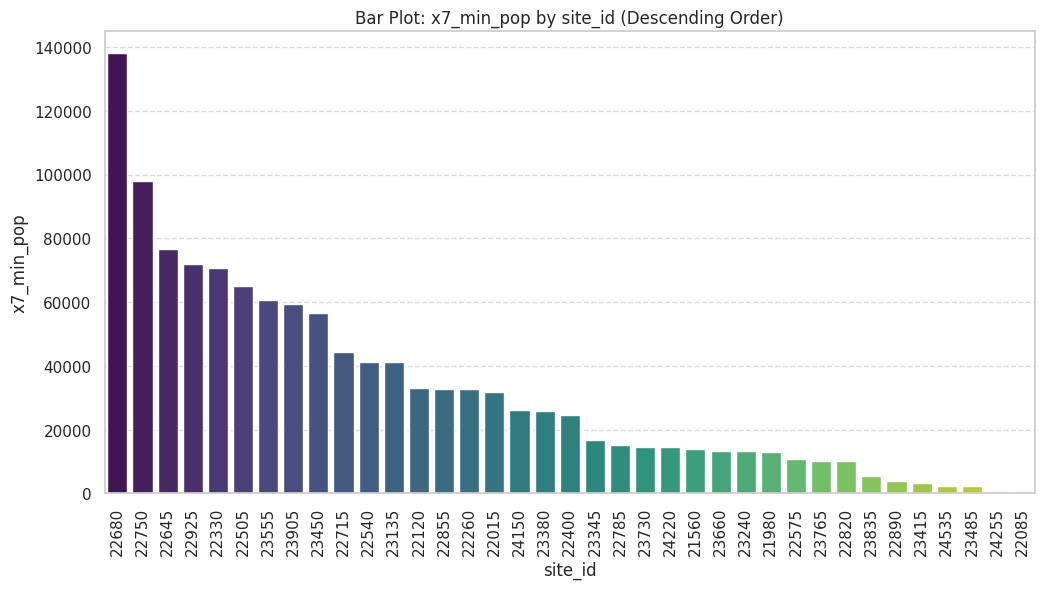

In [ ]:
# List of population variables
population_variables = ['x1_mile_pop', 'x1_2_mile_pop', 'x5_min_pop', 'x7_min_pop']

# Loop through each population variable and create a bar plot
for variable in population_variables:
    # Group the data by site_id and calculate the mean for the population variable
    data_to_plot = df_qdm.groupby('site_id_msba')[variable].mean().reset_index()

    # Sort the data in descending order by the population variable
    data_to_plot = data_to_plot.sort_values(by=variable, ascending=False)

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='site_id_msba', y=variable, data=data_to_plot, palette='viridis', order=data_to_plot['site_id_msba'])
    plt.title(f'Bar Plot: {variable} by site_id (Descending Order)')
    plt.xlabel('site_id')
    plt.ylabel(variable)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()



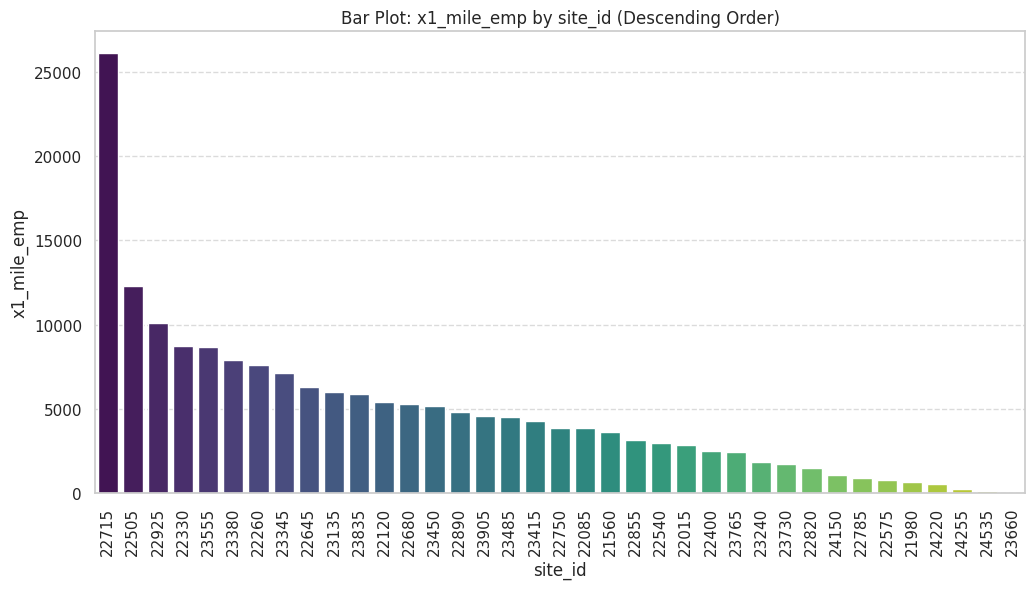

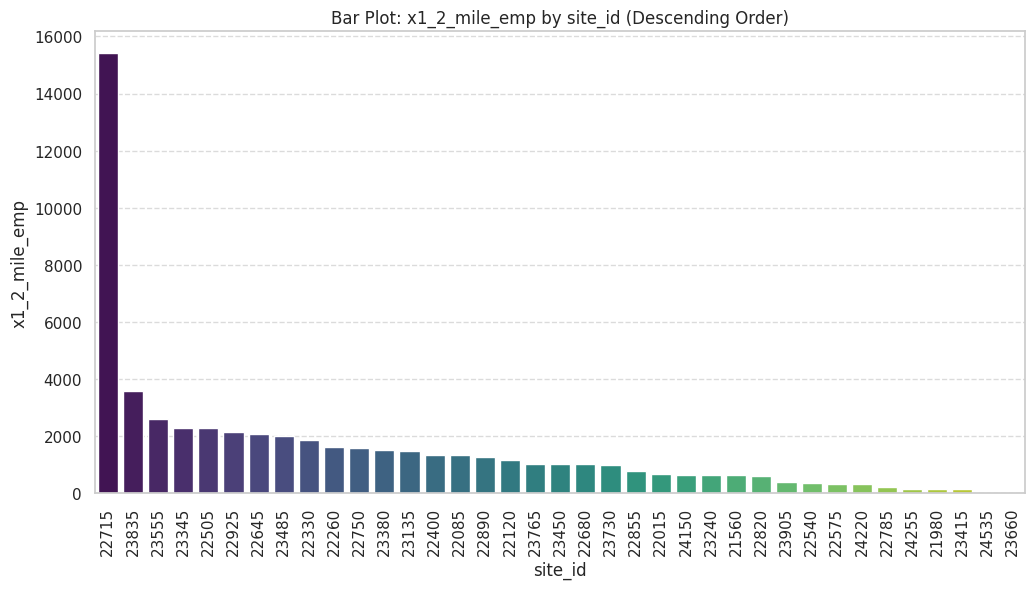

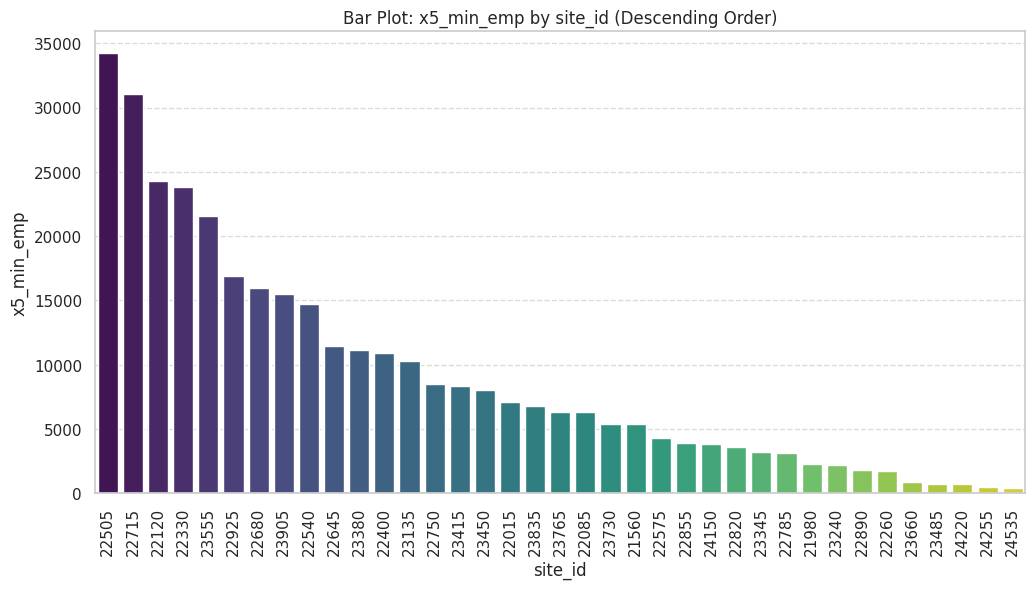

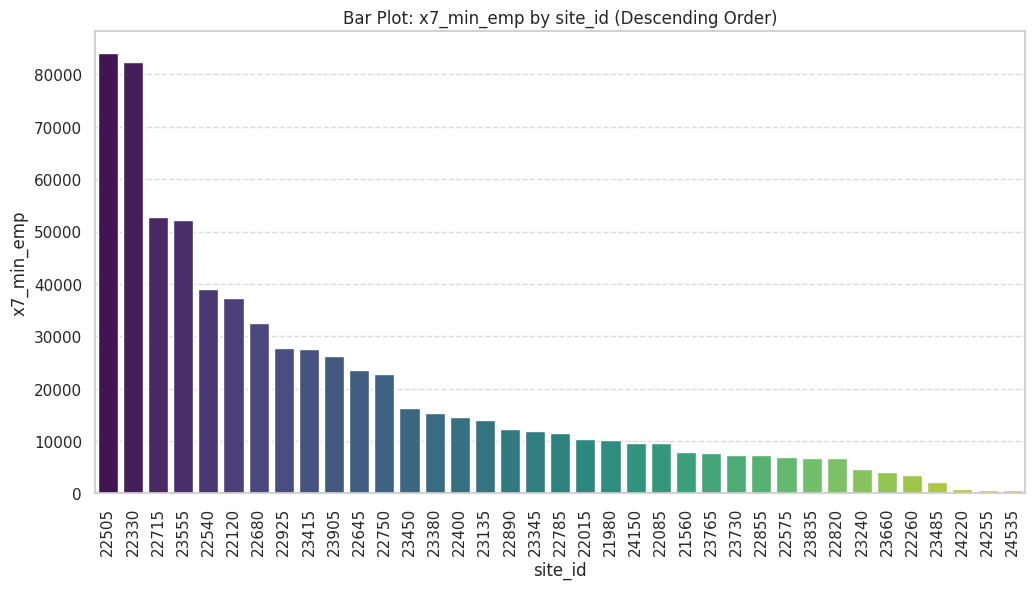

In [ ]:
# List of employment variables
employment_variables = ['x1_mile_emp', 'x1_2_mile_emp', 'x5_min_emp', 'x7_min_emp']

# Loop through each employment variable and create a bar plot
for variable in employment_variables:
    # Group the data by site_id and calculate the mean for the employment variable
    data_to_plot = df_qdm.groupby('site_id_msba')[variable].mean().reset_index()

    # Sort the data in descending order by the employment variable
    data_to_plot = data_to_plot.sort_values(by=variable, ascending=False)

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='site_id_msba', y=variable, data=data_to_plot, palette='viridis', order=data_to_plot['site_id_msba'])
    plt.title(f'Bar Plot: {variable} by site_id (Descending Order)')
    plt.xlabel('site_id')
    plt.ylabel(variable)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()


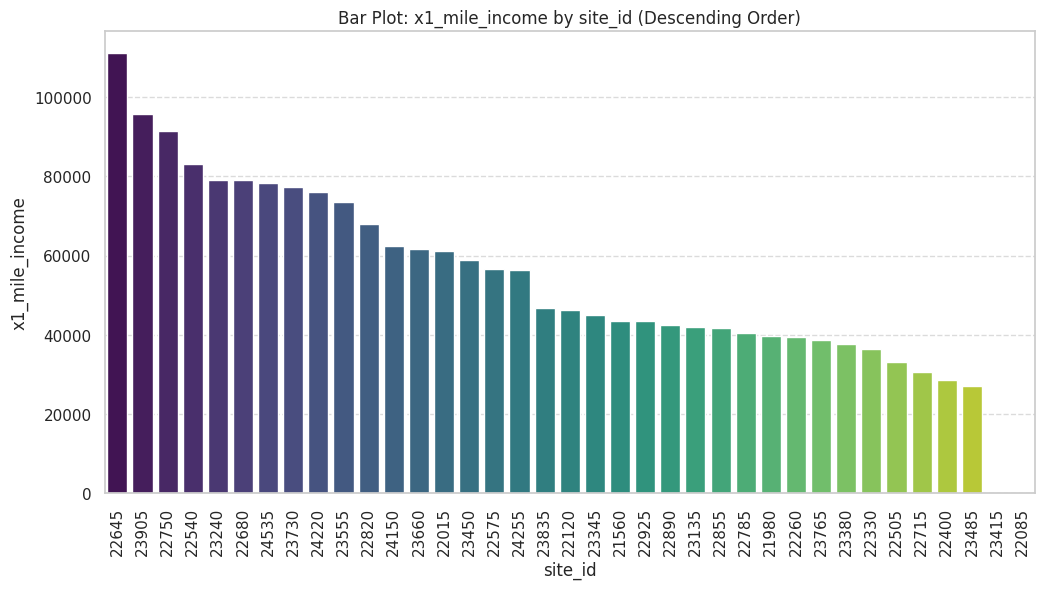

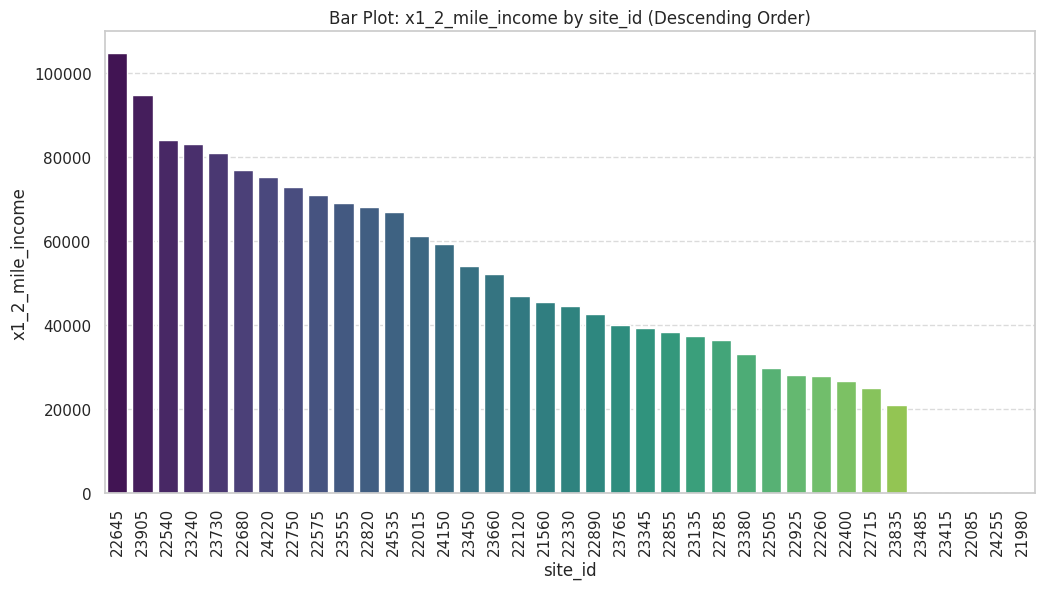

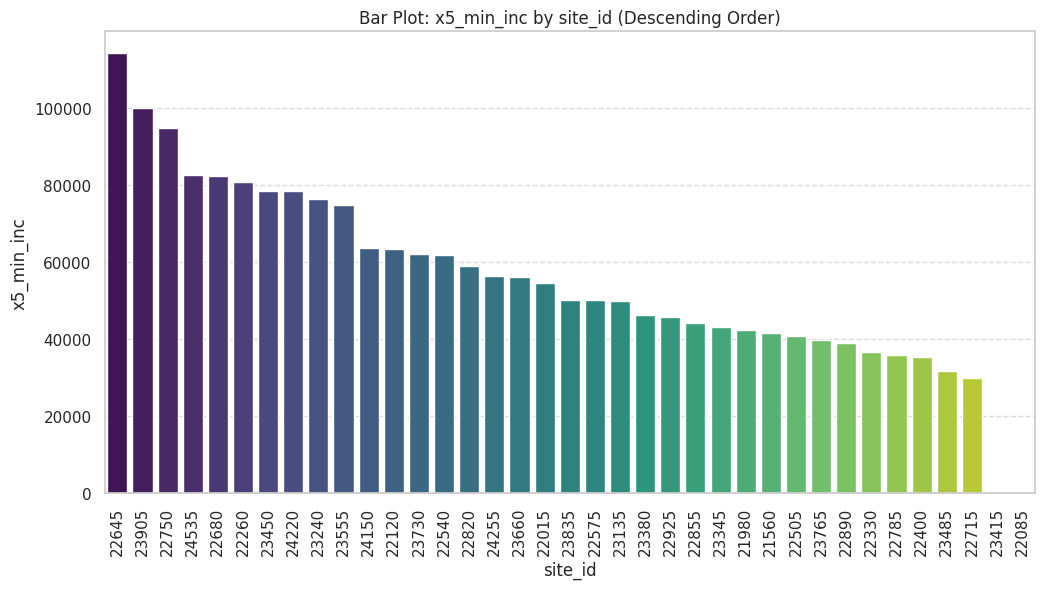

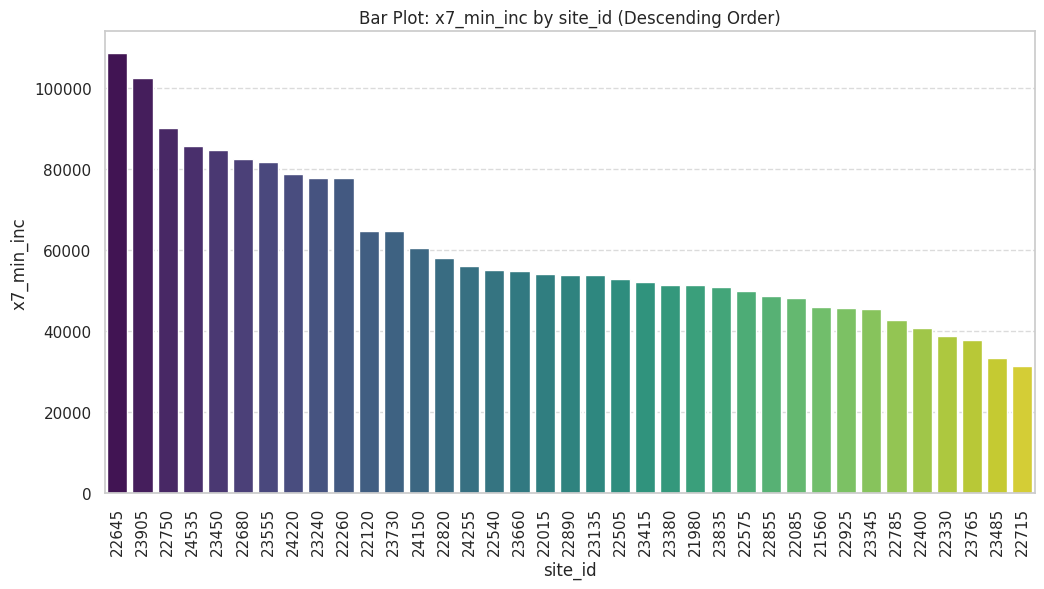

In [ ]:
# List of median income variables
income_variables = ['x1_mile_income', 'x1_2_mile_income', 'x5_min_inc', 'x7_min_inc']

# Loop through each income variable and create a bar plot
for variable in income_variables:
    # Group the data by site_id and calculate the mean for the income variable
    data_to_plot = df_qdm.groupby('site_id_msba')[variable].mean().reset_index()

    # Sort the data in descending order by the income variable
    data_to_plot = data_to_plot.sort_values(by=variable, ascending=False)

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='site_id_msba', y=variable, data=data_to_plot, palette='viridis', order=data_to_plot['site_id_msba'])
    plt.title(f'Bar Plot: {variable} by site_id (Descending Order)')
    plt.xlabel('site_id')
    plt.ylabel(variable)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()


In [ ]:
df_qdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               37 non-null     int64 
 1   open_year                                37 non-null     int64 
 2   square_feet                              37 non-null     int64 
 3   front_door_count                         37 non-null     int64 
 4   years_since_last_project                 37 non-null     int64 
 5   parking_spaces                           37 non-null     int64 
 6   lottery                                  37 non-null     object
 7   freal                                    37 non-null     object
 8   bonfire_grill                            37 non-null     object
 9   pizza                                    37 non-null     object
 10  cinnabon                                 37 non-null     object


<a class="anchor" id="lab"></a>
## *4.8 Feature Engineering-  Label encoding for converting Categorical variables to Numerical variables*


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Use the 'categorical_vars' list to identify categorical columns

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column in 'categorical_vars'
for column in categorical_vars:
    if column in df_qdm.columns:
        df_qdm[column] = label_encoder.fit_transform(df_qdm[column])

# The categorical columns are now encoded with numerical values

# Display the first few rows of the DataFrame to verify
print(df_qdm.head())


   Unnamed: 0  open_year  square_feet  front_door_count  \
0           1       2021         5046                 2   
1           2       2021         5046                 2   
2           3       2021         5046                 2   
3           4       2021         5046                 2   
4           5       2021         5046                 2   

   years_since_last_project  parking_spaces  lottery  freal  bonfire_grill  \
0                         2              38        1      1              1   
1                         2              39        0      1              1   
2                         2              35        1      1              1   
3                         2              36        0      1              1   
4                         2              25        1      1              1   

   pizza  ...  rv_lanes_fueling_positions_2 hi_flow_rv_lanes_layout  \
0      0  ...                             6                       3   
1      1  ...                     

<a class="anchor" id="mer"></a>
# *5. Merging the time series dataset with the qualitative dataset*

In [ ]:
merged_df = pd.merge(df_tsdm, df_qdm, on='site_id_msba', how='inner')

# Display the merged DataFrame
print(merged_df)


       Unnamed: 0_x capital_projects.soft_opening_date  \
0                 1                          6/14/2022   
1                 2                          6/14/2022   
2                 3                          6/14/2022   
3                 4                          6/14/2022   
4                 5                          6/14/2022   
...             ...                                ...   
13537         13904                          1/12/2021   
13538         13905                          1/12/2021   
13539         13906                          1/12/2021   
13540         13907                          1/12/2021   
13541         13908                          1/12/2021   

      calendar.calendar_day_date  calendar.fiscal_week_id_for_year  \
0                     2022-06-17                                25   
1                     2022-06-22                                25   
2                     2022-06-23                                25   
3                     2

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 79 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Unnamed: 0_x                             13542 non-null  int64         
 1   capital_projects.soft_opening_date       13542 non-null  object        
 2   calendar.calendar_day_date               13542 non-null  datetime64[ns]
 3   calendar.fiscal_week_id_for_year         13542 non-null  int64         
 4   calendar.day_of_week                     13542 non-null  int64         
 5   calendar_information.holiday             13542 non-null  object        
 6   calendar_information.type_of_day         13542 non-null  object        
 7   daily_yoy_ndt.total_inside_sales         13542 non-null  float64       
 8   daily_yoy_ndt.total_food_service         13542 non-null  float64       
 9   diesel_x                               

<a class="anchor" id="corr"></a>
## *5.1 Correlation Matrices*

In [ ]:
import pandas as pd

# Define the target variables
target_variables = [
    'daily_yoy_ndt.total_inside_sales',
    'daily_yoy_ndt.total_food_service',
    'diesel_x',
    'unleaded'
]

# Variables to exclude
excluded_variables = ['total_daily_sales', 'total_daily_fuel_sales','Unnamed: 0_y','Unnamed: 0_x']

# Calculate the correlation matrix for the merged DataFrame
correlation_matrix = merged_df.corr()

# Create a dictionary to store the top 10 correlated variables for each target variable
top_correlated_variables = {}

# Iterate through each target variable
for target_variable in target_variables:
    # Get the absolute correlations between the target variable and all other variables
    correlations = correlation_matrix[target_variable].abs()

    # Exclude specified variables
    correlations = correlations.drop(excluded_variables, errors='ignore')

    # Sort the correlations in descending order and select the top 10 (excluding the target variable itself)
    top_correlations = correlations.drop(target_variable).nlargest(10)

    # Store the top correlated variables in the dictionary
    top_correlated_variables[target_variable] = top_correlations.index.tolist()

# Print the top 10 correlated variables for each target variable
for target_variable, correlated_variables in top_correlated_variables.items():
    print(f"Top 10 correlated variables with '{target_variable}':")
    print(correlated_variables)
    print()

Top 10 correlated variables with 'daily_yoy_ndt.total_inside_sales':
['daily_yoy_ndt.total_food_service', 'diesel_x', 'pizza', 'rv_lanes', 'hi_flow_lanes_fueling_positions', 'hi_flow_lanes_fueling_positions_2', 'rv_lanes_fueling_positions', 'rv_lanes_fueling_positions_2', 'hi_flow_lanes', 'rv_lanes_stack_type']

Top 10 correlated variables with 'daily_yoy_ndt.total_food_service':
['daily_yoy_ndt.total_inside_sales', 'diesel_x', 'hi_flow_lanes_fueling_positions', 'hi_flow_lanes_fueling_positions_2', 'hi_flow_lanes', 'rv_lanes_stack_type', 'rv_lanes', 'rv_lanes_fueling_positions', 'rv_lanes_fueling_positions_2', 'rv_lanes_layout']

Top 10 correlated variables with 'diesel_x':
['hi_flow_lanes_fueling_positions', 'hi_flow_lanes_fueling_positions_2', 'mens_urinal_count', 'mens_toilet_count', 'womens_sink_count', 'daily_yoy_ndt.total_food_service', 'hi_flow_lanes', 'rv_lanes_stack_type', 'cat_scales', 'rv_lanes']

Top 10 correlated variables with 'unleaded':
['lottery', 'daily_yoy_ndt.total_

<ipython-input-68-862f048f3726>:15: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Top 10 correlation variables with Total inside sales**

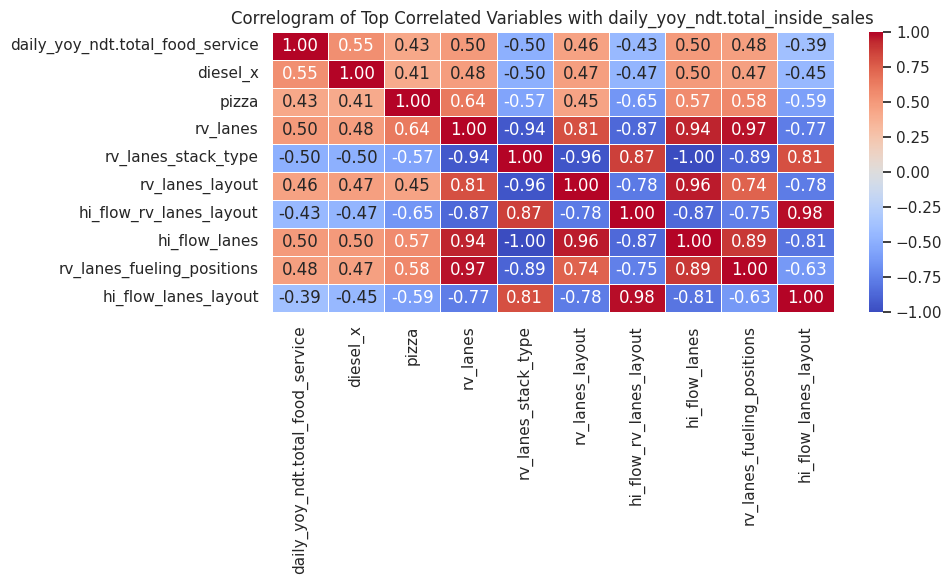

In [ ]:

# Define the top 10 correlated variables
top_correlated_vars = [
    'daily_yoy_ndt.total_food_service', 'diesel_x', 'pizza', 'rv_lanes',
    'rv_lanes_stack_type', 'rv_lanes_layout', 'hi_flow_rv_lanes_layout',
    'hi_flow_lanes', 'rv_lanes_fueling_positions', 'hi_flow_lanes_layout'
]

# Extract the correlation matrix for the top correlated variables
correlation_matrix = merged_df[top_correlated_vars].corr()

# Create a correlogram (correlation matrix heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlogram of Top Correlated Variables with daily_yoy_ndt.total_inside_sales')
plt.tight_layout()

# Show the correlogram
plt.show()


<ipython-input-70-afb008622746>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



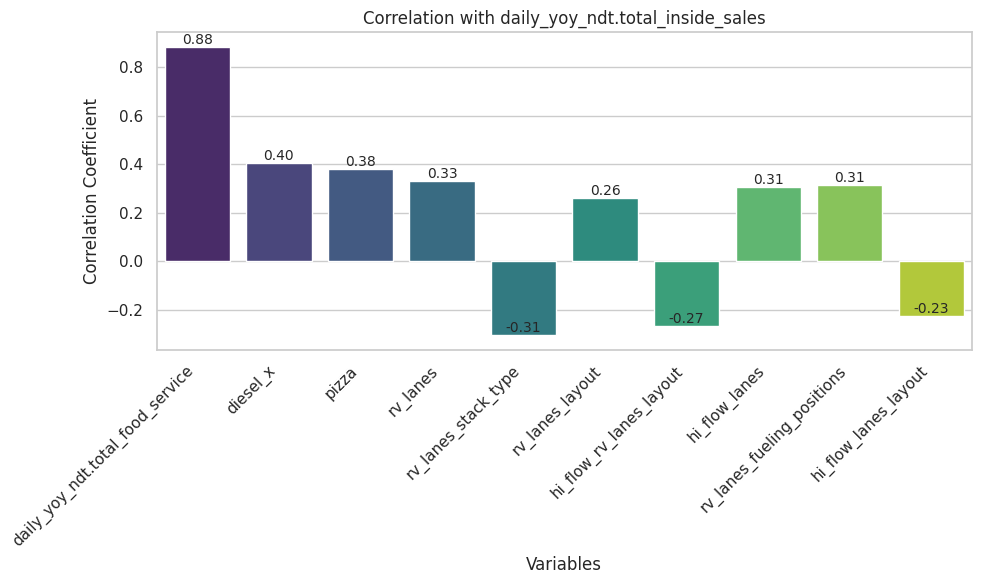

In [ ]:
# Define the top 10 correlated variables
top_correlated_vars = [
    'daily_yoy_ndt.total_food_service', 'diesel_x', 'pizza', 'rv_lanes',
    'rv_lanes_stack_type', 'rv_lanes_layout', 'hi_flow_rv_lanes_layout',
    'hi_flow_lanes', 'rv_lanes_fueling_positions', 'hi_flow_lanes_layout'
]

# Create a DataFrame for the correlation values
correlation_df = merged_df.corr()  # Replace with your actual correlation matrix

# Get the correlation values for 'daily_yoy_ndt.total_inside_sales' with the top 10 variables
correlation_values = correlation_df['daily_yoy_ndt.total_inside_sales'][top_correlated_vars]

# Create a bar chart for correlations
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_correlated_vars, y=correlation_values, palette='viridis')
plt.title('Correlation with daily_yoy_ndt.total_inside_sales')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate the bars with correlation values
for index, value in enumerate(correlation_values):
    bar_plot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Show the bar chart with annotations
plt.tight_layout()
plt.show()

 *As per the correlated bar plot, the total inside sales were in strong correlation with 1. Food service sales 2. Diesel gallons sold and 3. Pizza availability.*

**Top 10 correlation variables with Total Food service sales**

<ipython-input-71-de4ea397bddc>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



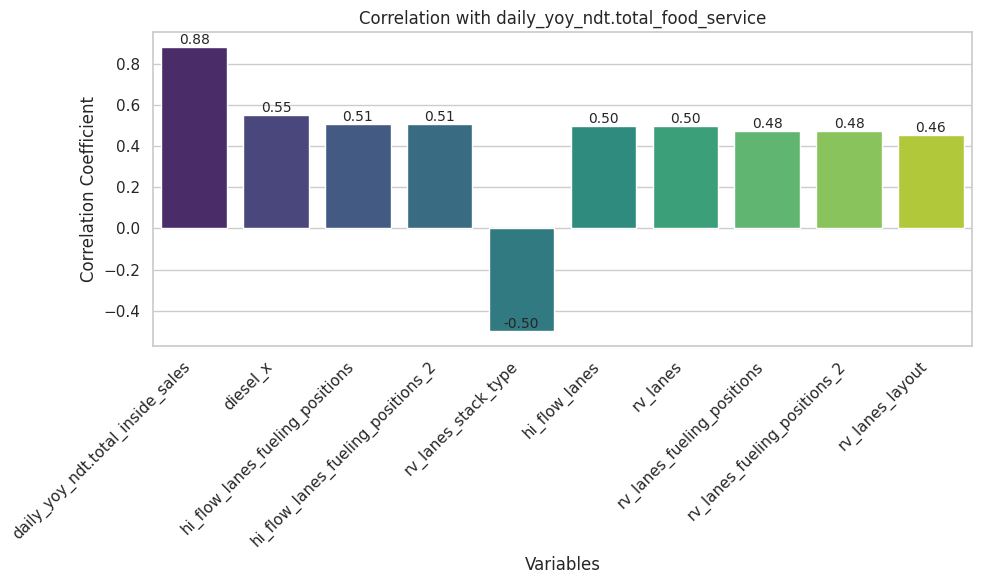

In [ ]:
# Define the top 10 correlated variables
top_correlated_vars = [
    'daily_yoy_ndt.total_inside_sales', 'diesel_x', 'hi_flow_lanes_fueling_positions', 'hi_flow_lanes_fueling_positions_2',
    'rv_lanes_stack_type', 'hi_flow_lanes', 'rv_lanes', 'rv_lanes_fueling_positions', 'rv_lanes_fueling_positions_2', 'rv_lanes_layout'
]

# Create a DataFrame for the correlation values
correlation_df = merged_df.corr()  # Replace with your actual correlation matrix

# Get the correlation values for 'daily_yoy_ndt.total_food_service' with the top 10 variables
correlation_values = correlation_df['daily_yoy_ndt.total_food_service'][top_correlated_vars]

# Create a bar chart for correlations
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_correlated_vars, y=correlation_values, palette='viridis')
plt.title('Correlation with daily_yoy_ndt.total_food_service')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate the bars with correlation values
for index, value in enumerate(correlation_values):
    bar_plot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Show the bar chart with annotations
plt.tight_layout()
plt.show()


*As per the correlated bar plot, the total food service sales were in strong correlation with  1. Total Inside sales  2. Number of Diesel gallons sold 3. Availability of High flow fuel positions.*

**Top 10 correlation variables with Diesel**

<ipython-input-72-3320275aaed6>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



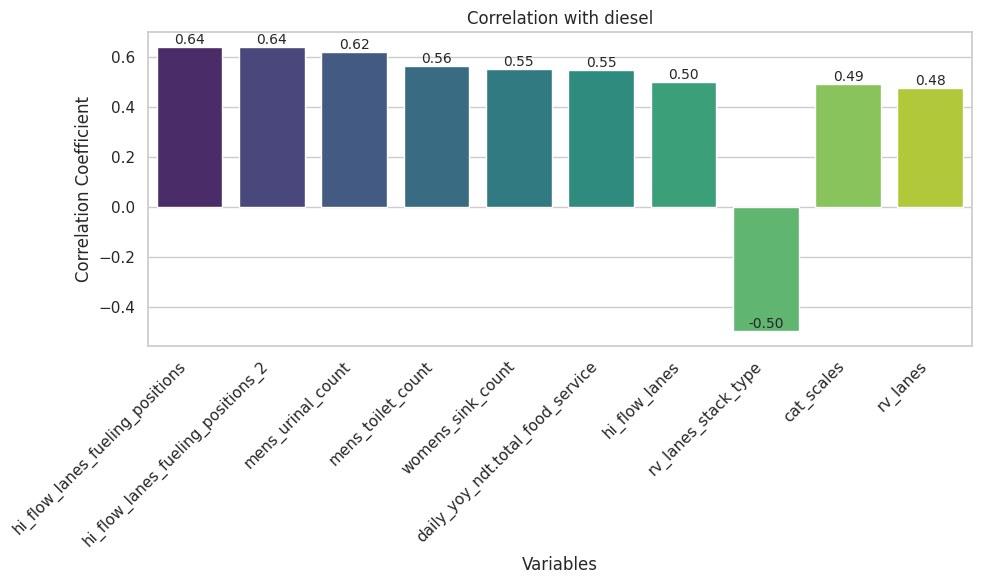

In [ ]:
# Define the top 10 correlated variables
top_correlated_vars = [
    'hi_flow_lanes_fueling_positions', 'hi_flow_lanes_fueling_positions_2', 'mens_urinal_count', 'mens_toilet_count',
    'womens_sink_count', 'daily_yoy_ndt.total_food_service', 'hi_flow_lanes', 'rv_lanes_stack_type', 'cat_scales', 'rv_lanes'
]

# Create a DataFrame for the correlation values
correlation_df = merged_df.corr()  # Replace with your actual correlation matrix

# Get the correlation values for 'diesel' with the top 10 variables
correlation_values = correlation_df['diesel_x'][top_correlated_vars]

# Create a bar chart for correlations
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_correlated_vars, y=correlation_values, palette='viridis')
plt.title('Correlation with diesel')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate the bars with correlation values
for index, value in enumerate(correlation_values):
    bar_plot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Show the bar chart with annotations
plt.tight_layout()
plt.show()

 *As per the correlated bar plot, diesel gallons sold were in strong correlation with  1.Availability of High flow fuel positions.2.mens_urnial_count 3.mens_toilet_count*

**Top 10 correlation variables with Unleaded**

<ipython-input-73-86c75f0376c9>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



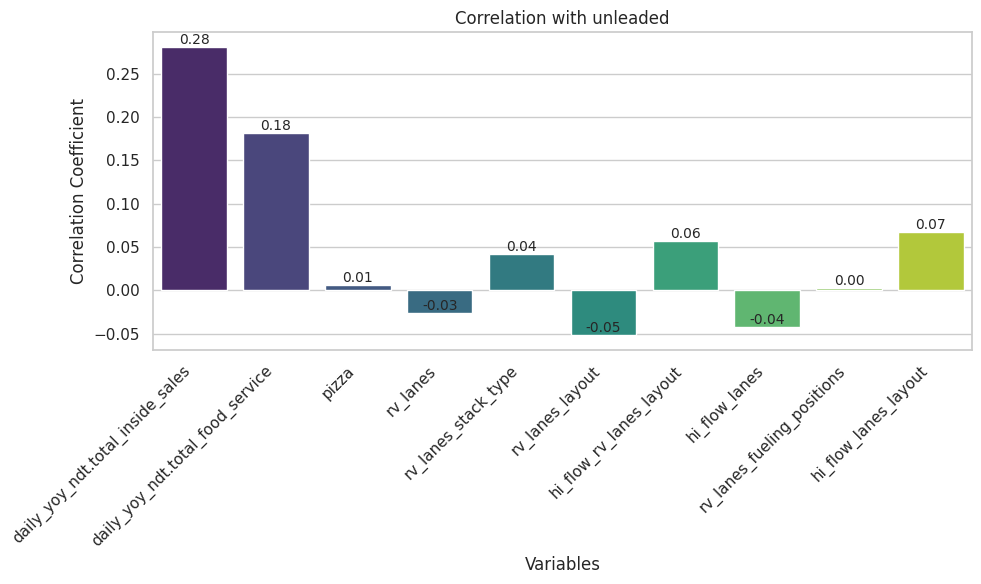

In [ ]:
# Define the top 10 correlated variables
top_correlated_vars = [
    'daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'pizza', 'rv_lanes',
    'rv_lanes_stack_type', 'rv_lanes_layout', 'hi_flow_rv_lanes_layout',
    'hi_flow_lanes', 'rv_lanes_fueling_positions', 'hi_flow_lanes_layout'
]

# Create a DataFrame for the correlation values
correlation_df = merged_df.corr()

# Get the correlation values for 'unleaded' with the top 10 variables
correlation_values = correlation_df['unleaded'][top_correlated_vars]

# Create a bar chart for correlations
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_correlated_vars, y=correlation_values, palette='viridis')
plt.title('Correlation with unleaded')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate the bars with correlation values
for index, value in enumerate(correlation_values):
    bar_plot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Show the bar chart with annotations
plt.tight_layout()
plt.show()


*As per the correlated bar plot, all non-diesel gallons/unleaded sold were in strong correlation with  1. Lottery  2. Total Inside sales 3. years since last project.*

<a class="anchor" id="hol"></a>
## *5.2 Holiday vs Non-Holiday total daily fuel sales*

In [ ]:
# Group the 'merged_df' DataFrame by the 'calendar_information.holiday' column
holiday_fuel_sales = merged_df.groupby('calendar_information.holiday')['total_daily_fuel_sales'].describe()

# Reset the index of the DataFrame to convert the grouped-by values into a column
holiday_fuel_sales.reset_index(inplace=True)

holiday_fuel_sales

calendar_information.holiday    count         mean          std        min  \
0               All Saint's Day     37.0  4410.757608  2779.691996  1145.5640   
1                     Ascension     34.0  4666.302015  3081.437077  1158.0450   
2                 Christmas Day     37.0  1551.972176   693.931634   337.1970   
3                 Christmas Eve     37.0  2473.872554   992.136641   843.9025   
4                  Columbus Day     37.0  4558.993392  2557.522924  1199.0510   
5                        Easter     36.0  3161.145458  1967.906769   702.0160   
6                  Father's Day     37.0  3341.215784  2249.101734   750.9355   
7                      Flag Day     38.0  4658.869618  3115.888701  1047.7915   
8                   Good Friday     36.0  4805.674708  2607.354268  1143.9645   
9                 Halloween Day     37.0  3451.179162  2530.643795  1191.6135   
10             Independence Day     37.0  2913.870419  1846.872003   804.4610   
11                    Labor Day     37.0  3781.042338  2144.169470  1016.5645   
12           Lincoln's Birthday     37.0  3080.713622  1489.664455   787.3495   
13       Martin Luther King Day     37.0  3742.821108  1779.183035  1090.2045   
14                 Memorial Day     37.0  3649.906230  2263.730822   826.9555   
15                 Mother's Day     36.0  3201.183514  1688.735060   783.8460   
16                         NONE  12624.0  4171.412225  2549.105475   382.3365   
17               New Year's Day     37.0  2048.330351   899.828017   573.9475   
18               New Year's Eve     37.0  2830.532297  1140.178311   744.5970   
19                  Palm Sunday     35.0  3254.194300  2068.372616   696.1605   
20              President's Day     37.0  4148.618203  2017.706565  1189.3490   
21          Saint Patrick's Day     37.0  4274.989392  2320.501370  1018.5385   
22        Saint Valentine's Day     37.0  3885.591500  2029.317577  1218.5215   
23             Thanksgiving Day     37.0  2188.708446  1409.208831   704.3400   
24                Veteran's Day     37.0  4590.720703  2643.833191  1062.6035   
25        Washington's Birthday     37.0  3752.085608  2168.592030  1034.4495   

            25%         50%          75%         max  
0   2892.421000  4071.84400  4851.675500  17498.2010  
1   3112.347875  4614.75525  5312.503875  19354.5240  
2   1110.791500  1424.07650  2169.359500   3076.4405  
3   1757.644000  2262.54700  3024.581000   4894.6345  
4   3220.532000  4363.47450  5272.127000  15846.8380  
5   1747.592875  2662.85250  4336.787000  10843.1925  
6   1546.482000  2932.14950  4541.460000  11605.1810  
7   3013.122000  4496.65825  5333.341125  19579.6755  
8   3446.307375  4461.14375  6193.477500  15595.6255  
9   1931.660500  3001.17650  3894.352000  16029.1635  
10  1289.722000  2612.66600  3848.194000   9952.3935  
11  2230.504500  3533.07150  4924.244500  10749.2175  
12  2201.307500  2747.95150  3903.056500   6134.1140  
13  2342.119500  3924.26650  4566.061500   8409.3590  
14  2032.478000  3435.27800  4378.542000  13119.9845  
15  1848.823375  3025.90050  4484.713625   7334.7645  
16  2446.410750  3958.17100  5180.982625  23651.7295  
17  1365.843500  2079.25200  2657.298000   3624.8765  
18  2114.514500  2854.14150  3520.979000   5456.5700  
19  1900.253250  2742.57900  4459.848750  11501.0560  
20  2389.138500  4086.27800  5160.638000  10097.8010  
21  2855.055000  4198.61050  5137.457500  14241.8220  
22  2202.308500  3655.66950  4742.990000   9565.6995  
23  1378.114500  1927.22950  2499.952000   8747.1370  
24  2881.259500  4456.57450  5209.540000  15532.7130  
25  2425.017000  3416.99750  4237.411500  11755.5165

In [ ]:
#Find the holiday with the highest average total daily fuel sales
holiday_fuel_sales[holiday_fuel_sales['mean']==holiday_fuel_sales['mean'].max()]

calendar_information.holiday  count         mean          std        min  \
8                  Good Friday   36.0  4805.674708  2607.354268  1143.9645   

           25%         50%        75%         max  
8  3446.307375  4461.14375  6193.4775  15595.6255

In [ ]:
#Find the holiday with the lowest average total daily fuel sales
holiday_fuel_sales[holiday_fuel_sales['mean']==holiday_fuel_sales['mean'].min()]

calendar_information.holiday  count         mean         std      min  \
2                Christmas Day   37.0  1551.972176  693.931634  337.197   

         25%        50%        75%        max  
2  1110.7915  1424.0765  2169.3595  3076.4405

The holiday with the highest average total daily fuel sales is 'Good Friday', with a mean sales value of approximately 4805.67.

'Christmas Day' has the lowest average total daily sales, with a mean value of around 1551.97.


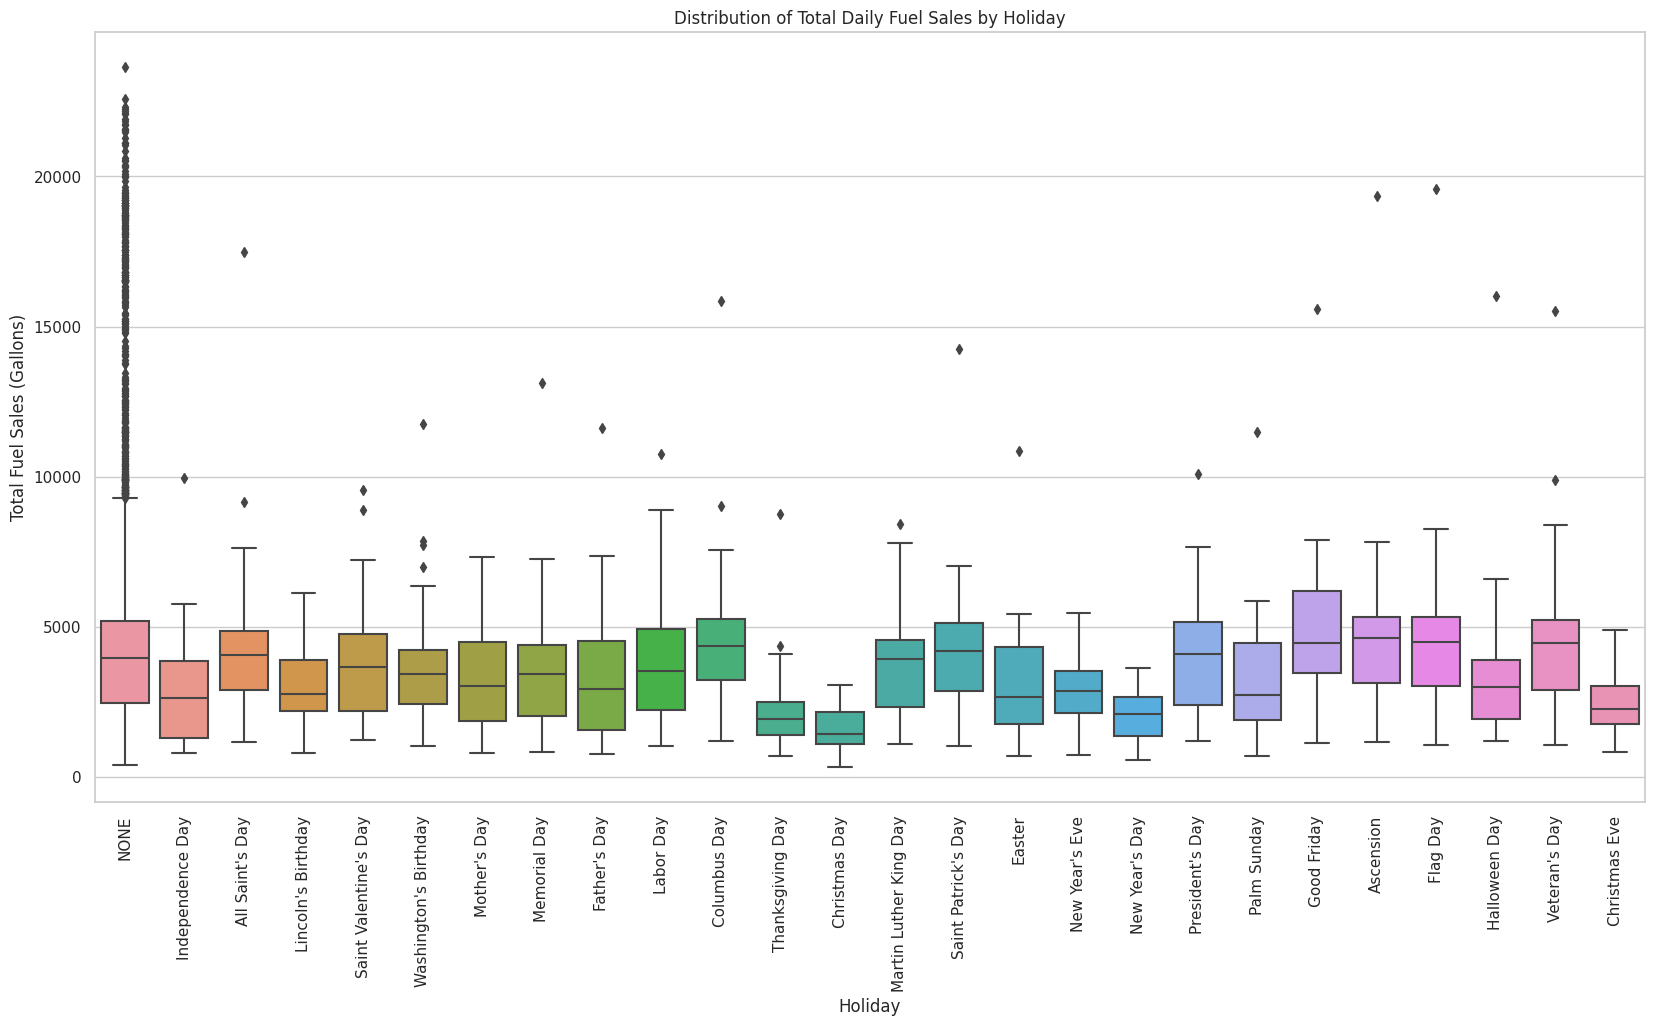

In [ ]:
# Create a new figure with specified size (width=20, height=10)
plt.figure(figsize=(20, 10))

# Create a boxplot wherein
# 'x' specifies the column for the x-axis ('calendar_information.holiday')
# 'y' specifies the column for the y-axis ('total_daily_fuel_sales')
sns.boxplot(data=merged_df, x='calendar_information.holiday', y='total_daily_fuel_sales')

# Set the title of the plot
plt.title('Distribution of Total Daily Fuel Sales by Holiday')

# Set the label for the x-axis
plt.xlabel('Holiday')

# Set the label for the y-axis
plt.ylabel('Total Fuel Sales (Gallons)')

# Rotate x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

There is a similar variation in total daily gallons of fuel sold across different holidays.
Holidays like 'Good Friday', 'Ascension', and 'Flag Day' tend to have higher median sales compared to others.

'Thanksgiving Day' and 'Christmas Day' appear to have lower median sales, which could be due to people spending more time at home.


In [ ]:
df_qdm.describe()

Unnamed: 0    open_year  square_feet  front_door_count  \
count   37.000000    37.000000     37.00000              37.0   
mean    19.000000  2021.324324   4970.27027               2.0   
std     10.824355     0.474579    575.93121               0.0   
min      1.000000  2021.000000   2933.00000               2.0   
25%     10.000000  2021.000000   5046.00000               2.0   
50%     19.000000  2021.000000   5046.00000               2.0   
75%     28.000000  2022.000000   5046.00000               2.0   
max     37.000000  2022.000000   6134.00000               2.0   

       years_since_last_project  parking_spaces    lottery      freal  \
count                 37.000000       37.000000  37.000000  37.000000   
mean                   1.648649       37.405405   0.621622   0.972973   
std                    0.483978        5.918237   0.491672   0.164399   
min                    1.000000       23.000000   0.000000   0.000000   
25%                    1.000000       34.000000   0.000000   1.000000   
50%                    2.000000       38.000000   1.000000   1.000000   
75%                    2.000000       41.000000   1.000000   1.000000   
max                    2.000000       49.000000   1.000000   1.000000   

       bonfire_grill      pizza  ...  hi_flow_lanes_fueling_positions  \
count      37.000000  37.000000  ...                        37.000000   
mean        0.702703   0.405405  ...                         3.324324   
std         0.463373   0.497743  ...                         2.925501   
min         0.000000   0.000000  ...                         0.000000   
25%         0.000000   0.000000  ...                         0.000000   
50%         1.000000   0.000000  ...                         5.000000   
75%         1.000000   1.000000  ...                         5.000000   
max         1.000000   1.000000  ...                         9.000000   

       hi_flow_lanes_layout  hi_flow_lanes_fueling_positions_2  \
count             37.000000                          37.000000   
mean               0.459459                           3.324324   
std                0.557504                           2.925501   
min                0.000000                           0.000000   
25%                0.000000                           0.000000   
50%                0.000000                           5.000000   
75%                1.000000                           5.000000   
max                2.000000                           9.000000   

       rv_lanes_fueling_positions_2  hi_flow_rv_lanes_layout  \
count                     37.000000                37.000000   
mean                       2.513514                 0.864865   
std                        2.049683                 1.031777   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        4.000000                 0.000000   
75%                        4.000000                 2.000000   
max                        6.000000                 3.000000   

       mens_toilet_count  mens_urinal_count  womens_toilet_count  \
count          37.000000          37.000000            37.000000   
mean            2.378378           2.351351             4.648649   
std             0.923500           0.856875             1.751447   
min             0.000000           0.000000             0.000000   
25%             2.000000           2.000000             4.000000   
50%             2.000000           2.000000             4.000000   
75%             3.000000           3.000000             6.000000   
max             5.000000           5.000000            10.000000   

       womens_sink_count  site_id_msba  
count          37.000000     37.000000  
mean            1.702703  23040.405405  
std             0.740303    730.069801  
min             0.000000  21560.000000  
25%             1.000000  22540.000000  
50%             2.000000  22890.000000  
75%             2.000000  23555.0

<a class="anchor" id="questions"></a>
# *Questions*


1. The qualitative dataset had some missing values in the categorical columns. We have imputed then by creating a new category 'Not present' indicating that the feature is not available at the store. Is this the best way to deal with the null values? Should we use other imputation methods like mode, median?

2. Most of the distributions we visualized were skewed indicating the presence of outliers. What method would be best for dealing with outliers, Winsorization or using z-score to remove outliers?

3. Some columns are identical in the Qualitative Dataset. What needs to be done with those columns?

4. Some columns are having values with no variation for all the sites. Do we need to remove those while modeling as their contribution to the analysis is insignificant ?

5. Qualitative data provided to 37 sites but Time series data provided to 38 sites. Will we be getting the data for 38th site for Modeling ?


<a class="anchor" id="results"></a>
# *Results*

Throughout our exploration, we focused on understanding how various features correlate with the sales features, to aid in forecasting first-year sales for Maverik's new stores. We began by examining the qualitative and time-series datasets separately, performing EDA that included missing value treatment, outlier detection, and basic visualizations like histograms and bar charts. Sales-related features ('daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', and 'unleaded') generally exhibited right-skewed distributions, as did store attributes like 'square_feet' and 'parking_spaces'. This skewness suggests that most stores have lower sales and smaller sizes. When examining the impact of holidays on 'total_sales', we found significant variations. For instance, 'Good Friday' showed the highest average sales, while 'New Year's Day' had the lowest. This variation in sales across holidays suggests that special events can significantly influence customer purchasing behavior. Time-series decomposition showed discernible seasonal patterns, particularly gradual increase in sales from Monday to Friday and then a dip on the Weekends. We also found a heavy dive in sales during the end of year. During 2nd,3rd quarters of Year 2022, sales were found to be highest with June-2022 is the month with highest sales.

<a class="anchor" id="contrib"></a>
# *Contributions*

<a class="anchor" id="contrib4"></a>
## *Vinay Kumar Vascuri*

I worked on the EDA of Time series dataset ,Qualitative dataset and Merged datasets. I analysed the Descriptive statistics of TimeSeries dataset which included Average Fuel & Non-Fuel sales, Correlation matrix of Target Variables with other variables & Feature engineering. Contributed to Introduction,Questions & Results area.